# NASA Jet Engine Failure Classification Based On Sensor Data

## 1. Business Understanding

**Overview**
<hr>

Tahap ini akan menjelaskan hal-hal yang melatar belakangi pengerjaan proyek, merumuskan masalah yang dihadapi, dan tujuan akhir yang ingin dicapai dari proyek *jet engine predictive maintenance* sehingga dapat menjawab masalah yang telah didefinisikan.

**Objectives**
<hr>

Tahap ini penting dilakukan untuk menentukan tujuan proyek, pendefinisian masalah bisnis, dan penentuan kriteria keberhasilan.

**1.1 Hal yang mendasari pembuatan proyek**

Mesin jet merupakan salah satu komponen krusial yang digunakan dalam industri antariksa NASA. Mesin ini digunakan sebagai sumber tenaga dari suatu kendaraan seperti pesawat agar mampu terbang dengan adanya gaya dorong yang dihasilkan dari mesin. Melihat betapa krusialnya peran mesin pada suatu kendaraan, maka diperlukan suatu analisis yang mampu memprediksi kesehatan dari mesin apakah masih berfungsi dengan normal atau sudah mulai membutuhkan perawatan lebih lanjut. Hal ini bertujuan untuk menghindari kegagalan mesin secara mendadak yang berpotensi membahayakan kendaraan tersebut. Salah satu cara untuk mengukur performa mesin adalah dengan menggunakan sensor. Sensor-sensor ini bekerja untuk mengetahui berbagai hal seperti suhu, putaran, tekanan, vibrasi pada mesin, dan lainnya. Untuk itu, pada proyek ini akan dilakukan proses analisis untuk memprediksi kesehatan mesin berdasarkan data sensor sebelum mesin benar-benar mati.


**1.2 Masalah yang dihadapi**

Ketidaktahuan tentang kesehatan mesin dapat berpotensi menyebabkan kegagalan mesin secara mendadak saat digunakan.

**1.3 Proyek yang diusulkan untuk memecahkan masalah**

Mengklasifikasikan kesehatan mesin ke dalam kategori normal atau *failure* berdasarkan data sensor.

**1.4 Sudut pandang bisnis**

Proyek ini tidak hanya berlaku untuk memprediksi mesin jet saja. Tetapi bisa digunakan untuk semua mesin yang dipantau dengan sensor-sensor. Misalnya seperti mesin pabrik. Dari sisi bisnis, mesin pabrik perlu dilakukan monitoring untuk mencegah mesin mati mendadak saat digunakan pada proses produksi. Ketika mesin mendadak mati saat produksi, akan menghambat proses produksi dari pabrik tersebut yang akan berakibat pada penumpukan bahan baku, keterlambatan pengiriman hasil produk, dan berpotensi merugikan perusahaan.

**1.5 Kasus lain yang bisa diselesaikan**

Berikut beberapa contoh penerapan untuk memprediksi mesin normal atau *failure* menggunakan proyek ini:

1. Mesin produksi pada suatu pabrik
2. Mesin mobil yang sudah memiliki *Electronic Control Unit* (ECU)
3. Mesin atau alat elektronik lain yang memiliki data sensor

**1.6 Flowchart**

Berikut diagram alir dari pengerjaan proyek ini. Mulai dari tahap *pre-processing* sampai *prediction*.

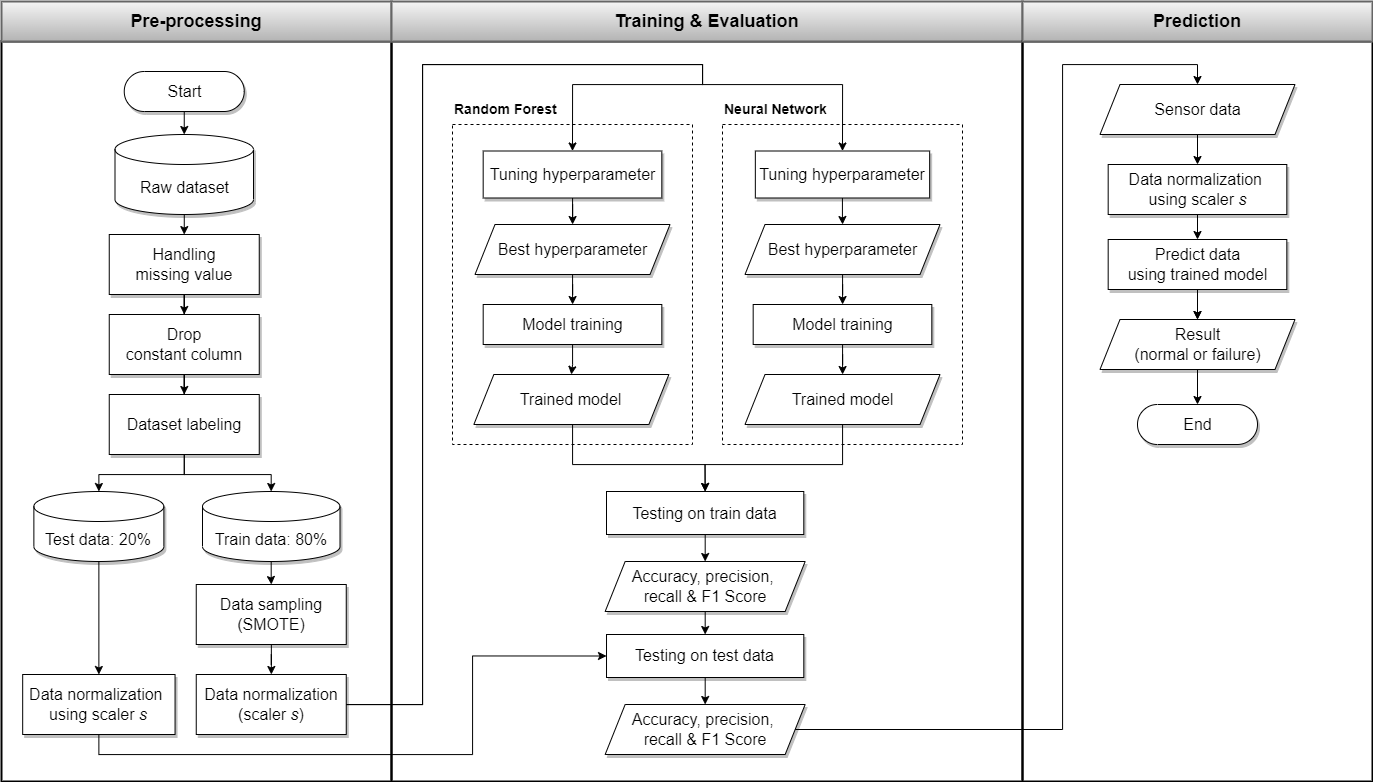

**1.7 Kriteria Keberhasilan**

Terciptanya aplikasi end user yang simpel, mudah diakses, mudah digunakan, dan memiliki performa yang baik untuk memprediksi kesehatan suatu mesin.

Proyek ini akan menggunakan dataset dari NASA yang berisi data sensor pada mesin jet. Data tersebut kemudian dilakukan pre-processing untuk membersihkan data kemudian akan dilatih menggunakan algoritma Machine Learning berupa `Random Forest` dan `Artificial Neural Network`. Model yang telah dihasilkan kemudian akan digunakan untuk proses prediksi pada data baru.

**Dataset**

CMAPSS Jet Engine Simulated Data: https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

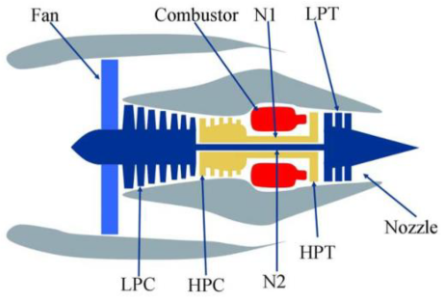

*Gambar 1. Komponen pada mesin jet*

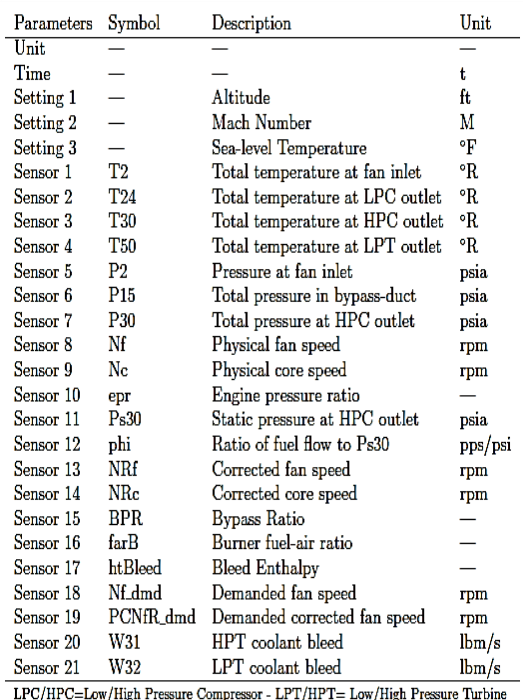

*Gambar 2. Penjelasan tiap prediktor pada dataset*

## 2. Data Understanding

**Overview**
<hr>

Tahap ini merupakan proses pengenalan terhadap data. Proses ini akan memanggil data yang akan digunakan dan melihat data awal sebelum diproses lebih jauh.

**Objectives**
<hr>

Menyiapkan data untuk diolah pada proses selanjutnya.


In [ ]:
# Install library shap untuk interpretasi model
!pip install shap

# Install library keras-tuner untuk tuning hyperparameter ANN
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Memasukkan library dasar yang dibutuhkan untuk mengolah data
import os
import pandas as pd
import math
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk proses pre-processing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Library untuk modeling dan evaluations random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Library untuk membuat visualisasi tree pada random forest
from sklearn.tree import plot_tree

# Library untuk menyimpan model
from joblib import dump, load

# library untuk tuning hyperparameter pada ANN
import keras_tuner as kt
import keras

# Import library untuk membangun arsitektur neural network
from keras.layers import Dense
from keras.models import Sequential

# Import library untuk mengurangi nilai error
from keras.optimizers import Adam

# Import library untuk mencegah overfitting
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Import library untuk interpretasi model neural network
import shap

In [ ]:
# Membaca file dataset dan mengubah ke dalam bentuk dataframe
data = pd.read_csv("/content/train_FD001.txt", sep=" ", header=None)

In [ ]:
# Cek dimensi dataset
print("Shape of data :", data.shape)

Shape of data : (20631, 28)


**Insight:**

Dataset yang akan digunakan memiliki 20.631 data dengan 28 fitur (prediktor)

In [ ]:
# Menampilkan dataset awal
data

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190   
1      14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236   
2      14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442   
3      14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739   
4      14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044   
...      ...  ...      ...     ...   ...  ...   ...    ...    ...      ...   
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
...    ..  ..  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[20631 rows x 28 columns]

**Insight:**

Dari dataset, terlihat nama kolom yang belum representatif (masih dalam bentuk angka) dan terdapat kolom yang berisi nilai **NaN** (*Not a Number*) pada 2 kolom terakhir. Hal ini perlu dilakukan proses lanjutan agar data menjadi bersih. Proses pembersihan ini akan dilakukan pada tahap [Data Preparation](#data-preparation). Namun sebelum itu, akan masuk pada tahapan [EDA (Exploratory Data Analysis)](#eda) untuk melihat visualisasi data sehingga kita bisa mendapatkan pemahaman yang lebih dalam terhadap data.

<a name="eda"></a>
## 3. Exploratory Data Analysis (EDA)

**Overview**<hr>

Tahap ini merupakan proses visualisasi terhadap data. Membuat beberapa diagram / plot dari data.

**Objectives**<hr>

Proses EDA penting dilakukan karena memungkinkan ilmuwan data menganalisis data sebelum mengambil asumsi apa pun dan memastikan bahwa hasil yang dihasilkan valid dan dapat diterapkan pada hasil dan tujuan bisnis.

In [ ]:
# Menghapus nilai NaN pada 2 kolom terakhir dataset
data.drop(columns=[26, 27], inplace=True)

In [ ]:
# Buat daftar nama kolom sesuai deskripsi dataset
columns = [
    'engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1',
    'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
    'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
    'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
    'sensor20', 'sensor21'
]

In [ ]:
# Mengganti nama kolom pada dataset
data.columns = columns

# Menampilkan dataset yang sudah diberi nama kolom baru
data

engine  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0           1      1   -0.0007   -0.0004     100.0   518.67   641.82  1589.70   
1           1      2    0.0019   -0.0003     100.0   518.67   642.15  1591.82   
2           1      3   -0.0043    0.0003     100.0   518.67   642.35  1587.99   
3           1      4    0.0007    0.0000     100.0   518.67   642.35  1582.79   
4           1      5   -0.0019   -0.0002     100.0   518.67   642.37  1582.85   
...       ...    ...       ...       ...       ...      ...      ...      ...   
20626     100    196   -0.0004   -0.0003     100.0   518.67   643.49  1597.98   
20627     100    197   -0.0016   -0.0005     100.0   518.67   643.54  1604.50   
20628     100    198    0.0004    0.0000     100.0   518.67   643.42  1602.46   
20629     100    199   -0.0011    0.0003     100.0   518.67   643.23  1605.26   
20630     100    200   -0.0032   -0.0005     100.0   518.67   643.85  1600.38   

       sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  \
0      1400.60    14.62  ...    521.66   2388.02   8138.62    8.4195   
1      1403.14    14.62  ...    522.28   2388.07   8131.49    8.4318   
2      1404.20    14.62  ...    522.42   2388.03   8133.23    8.4178   
3      1401.87    14.62  ...    522.86   2388.08   8133.83    8.3682   
4      1406.22    14.62  ...    522.19   2388.04   8133.80    8.4294   
...        ...      ...  ...       ...       ...       ...       ...   
20626  1428.63    14.62  ...    519.49   2388.26   8137.60    8.4956   
20627  1433.58    14.62  ...    519.68   2388.22   8136.50    8.5139   
20628  1428.18    14.62  ...    520.01   2388.24   8141.05    8.5646   
20629  1426.53    14.62  ...    519.67   2388.23   8139.29    8.5389   
20630  1432.14    14.62  ...    519.30   2388.26   8137.33    8.5036   

       sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  
0          0.03       392      2388     100.0     39.06   23.4190  
1          0.03       392      2388     100.0     39.00   23.4236  
2          0.03       390      2388     100.0     38.95   23.3442  
3          0.03       392      2388     100.0     38.88   23.3739  
4          0.03       393      2388     100.0     38.90   23.4044  
...         ...       ...       ...       ...       ...       ...  
20626      0.03       397      2388     100.0     38.49   22.9735  
20627      0.03       395      2388     100.0     38.30   23.1594  
20628      0.03       398      2388     100.0     38.44   22.9333  
20629      0.03       395      2388     100.0     38.29   23.0640  
20630      0.03       396      2388     100.0     38.37   23.0522  

[20631 rows x 26 columns]

**Insight**

Setelah dataset diberi nama kolom sesuai deskripsi, dataset terlihat lebih mudah untuk dipahami maksud dari prediktornya.

In [ ]:
def get_plot_each_sensor(data, x_label, y_label):
    '''
    Function:
        Untuk menampilkan perubahan data sensor mesin dari awal sampai akhir cycle (failure)
        Digunakan untuk melihat kenaikan/penurunan data suatu sensor mendekati mesin failure
    Args:
        data -> dataframe utuh
        x_label -> prediktor/fitur yang akan menjadi sumbu X
        y_label -> prediktor/fitur yang akan menjadi sumbu y
    Return:
        line plot dan trend line
    '''

    # menentukan ukuran plot
    plt.figure(figsize=(13,5))

    # perulangan untuk plotting setiap mesin
    for i in data['engine'].unique():
        plt.plot(x_label, y_label, data=data[data['engine'] == i])

    # membuat trend line
    x = data[x_label]
    y = data[y_label]
    coefficients = np.polyfit(x, y, 2)  # 2 untuk kuadratik line
    trend_line = np.poly1d(coefficients)

    # generate nilai sumbu X untuk membuat trend line
    x_trend_line = np.linspace(x.min(), x.max(), 100)
    y_trend_line = trend_line(x_trend_line)

    # plot trend line
    plt.plot(x_trend_line, y_trend_line, 'r--', label='Trend Line')

    # menampilkan line plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

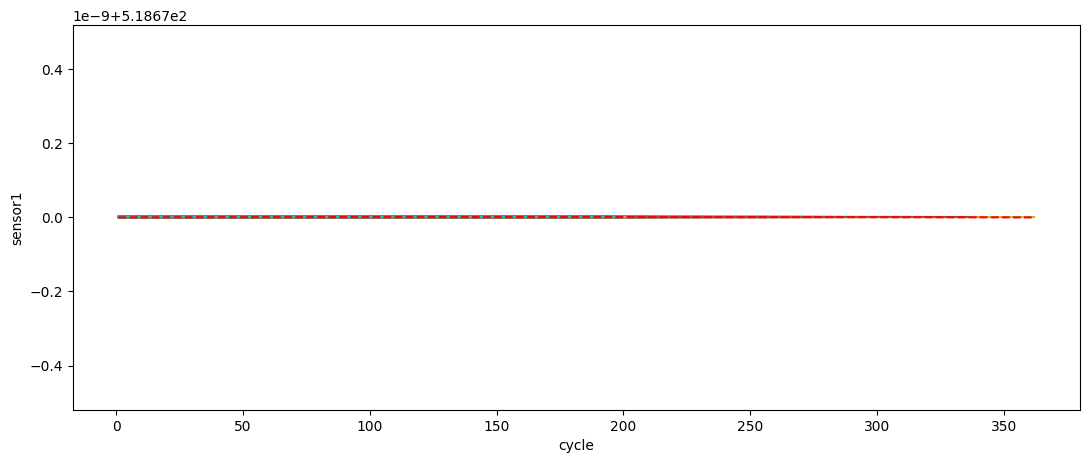

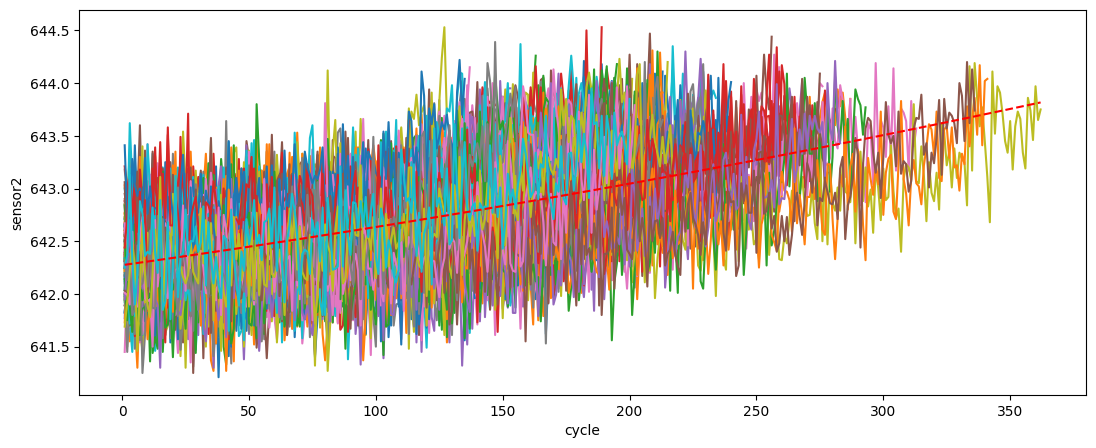

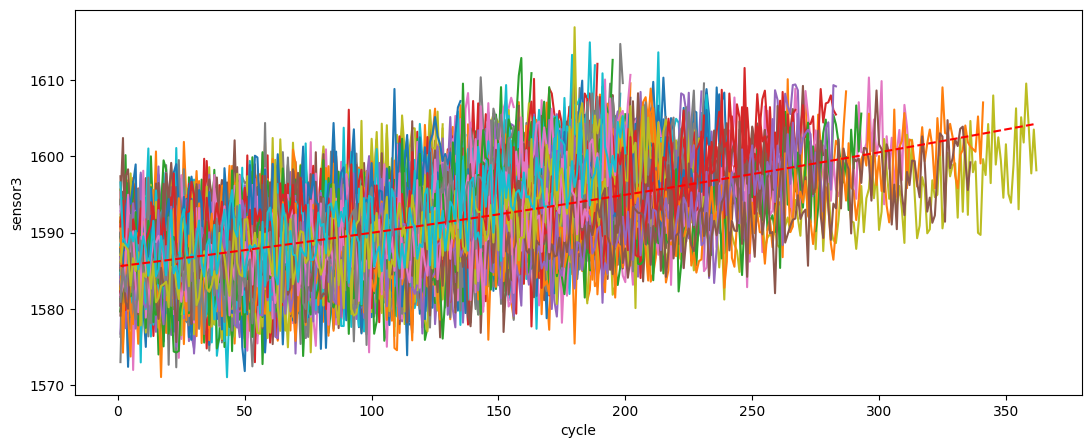

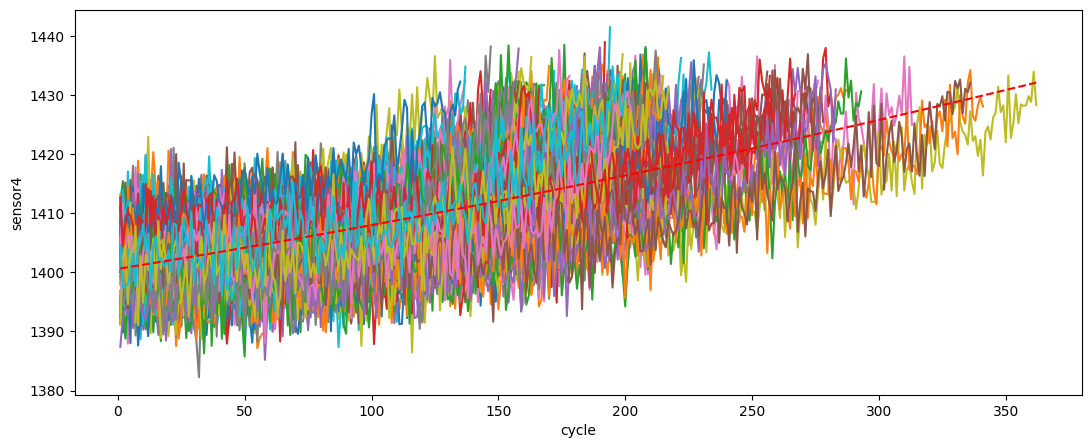

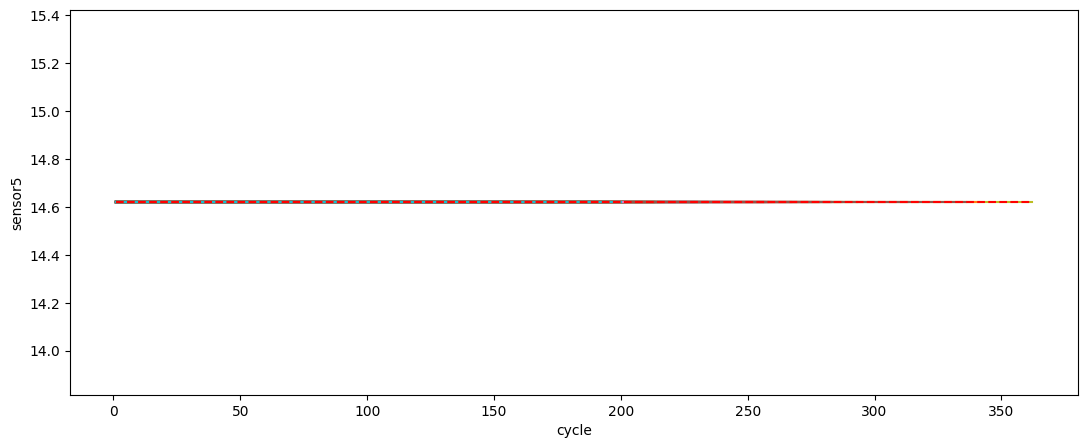

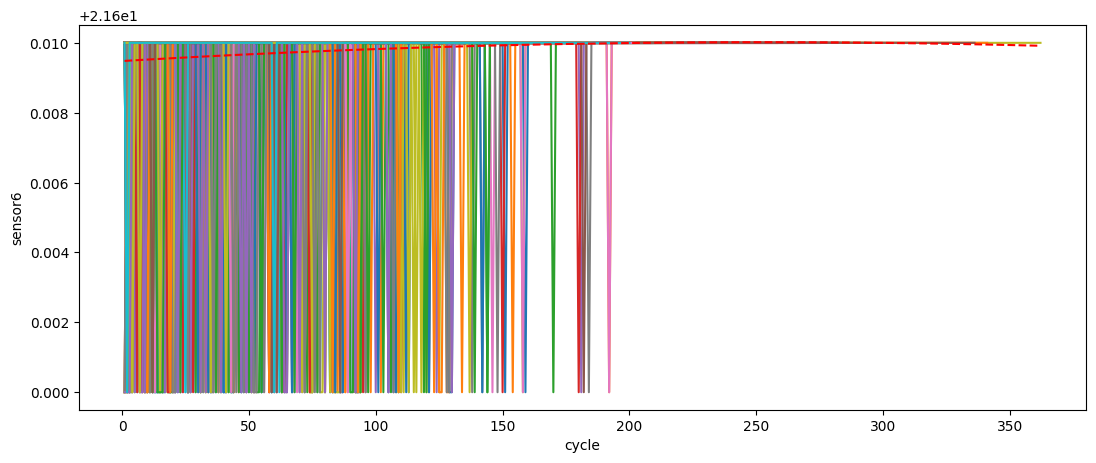

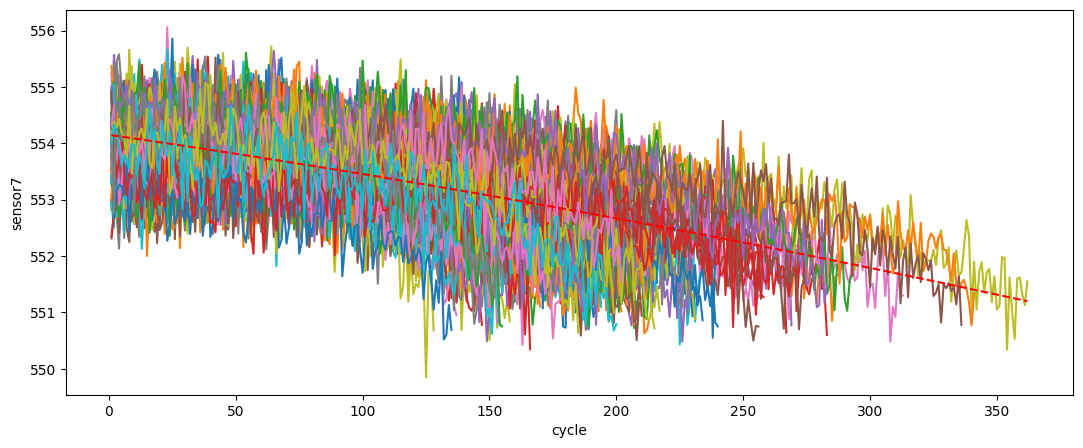

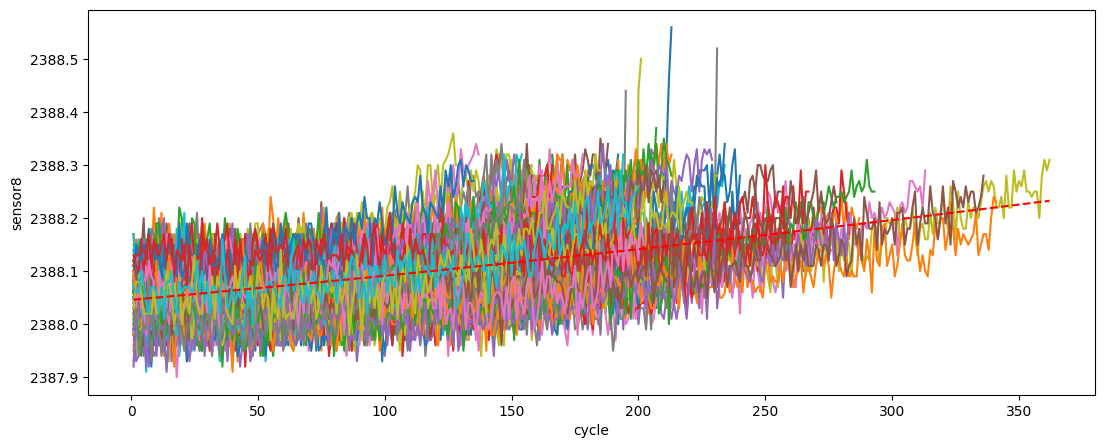

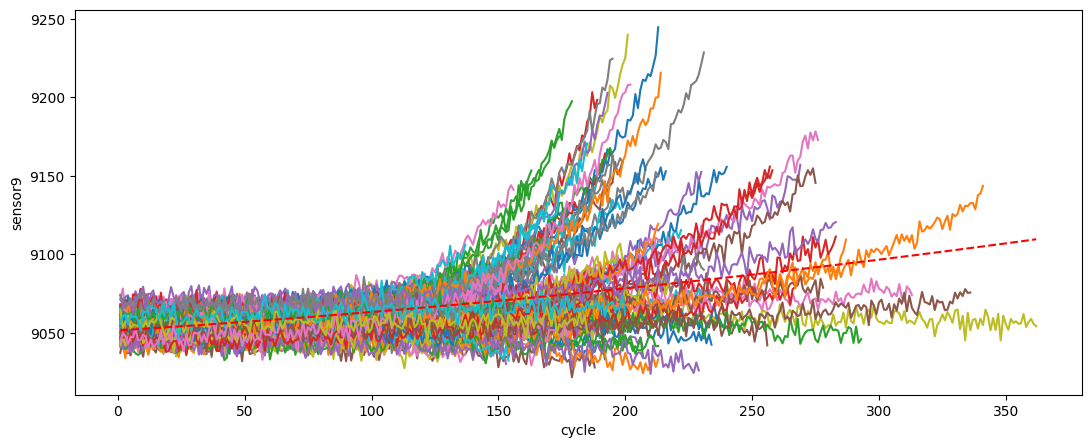

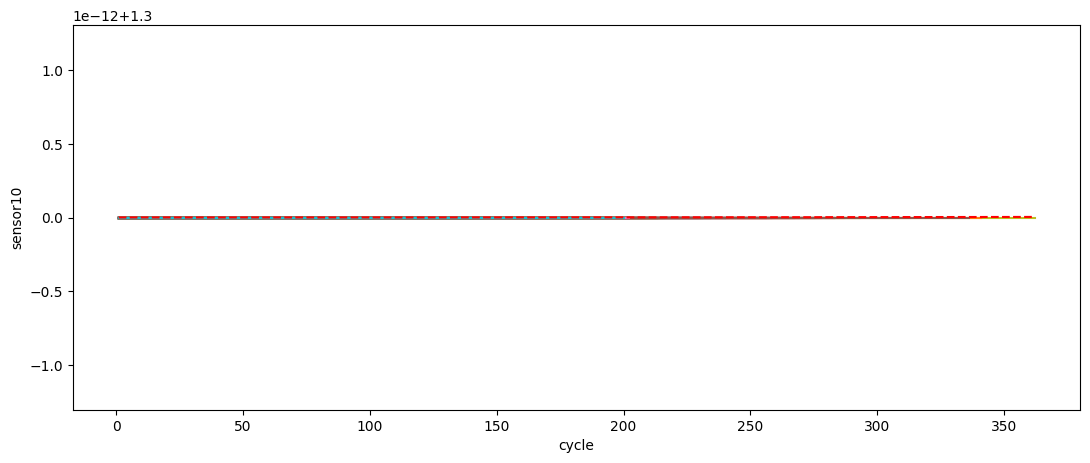

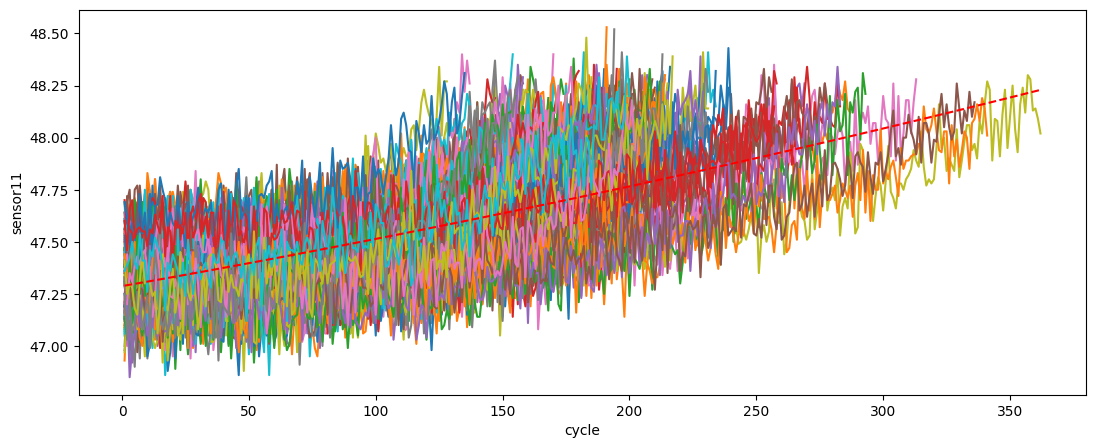

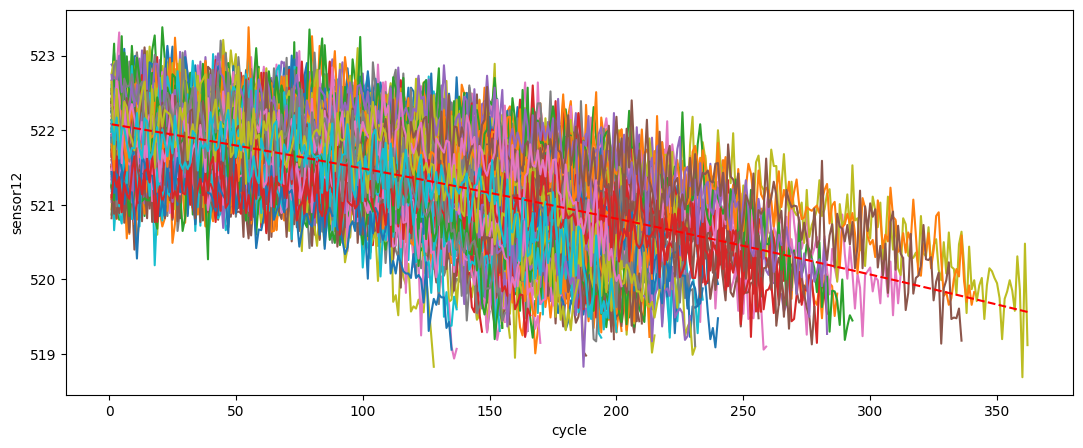

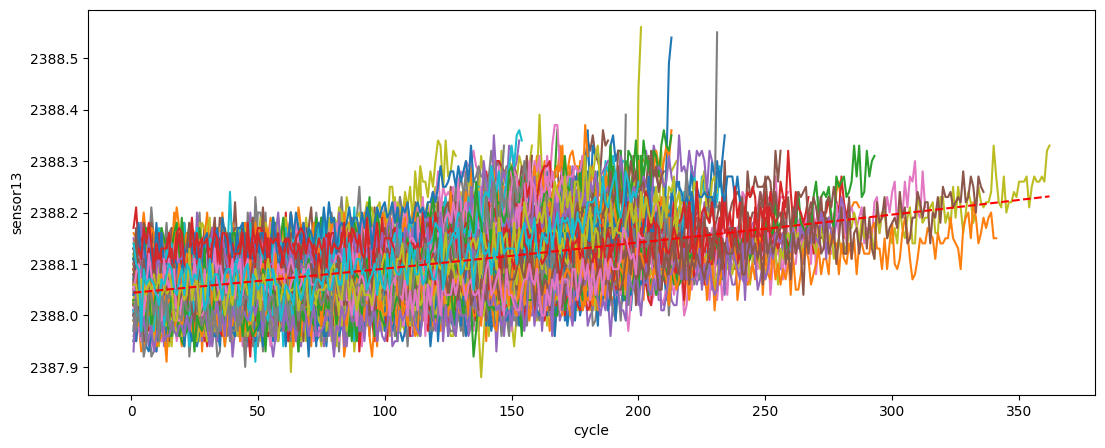

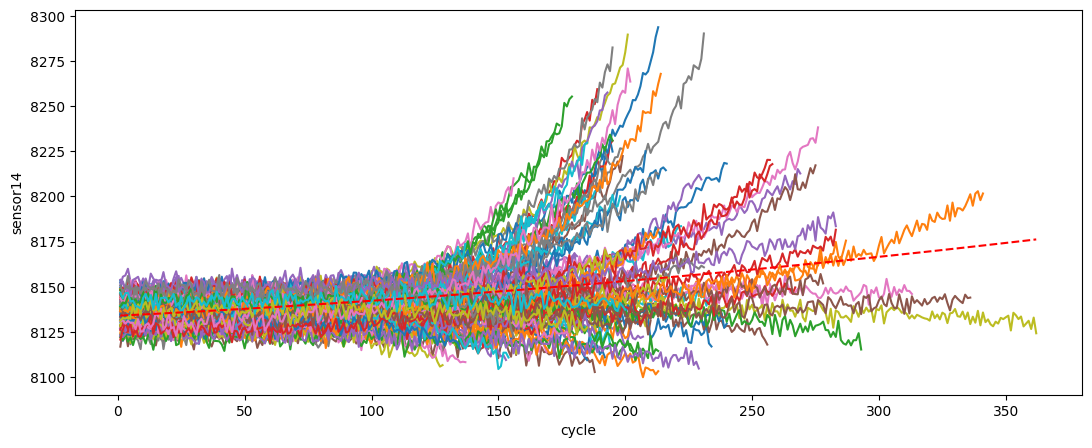

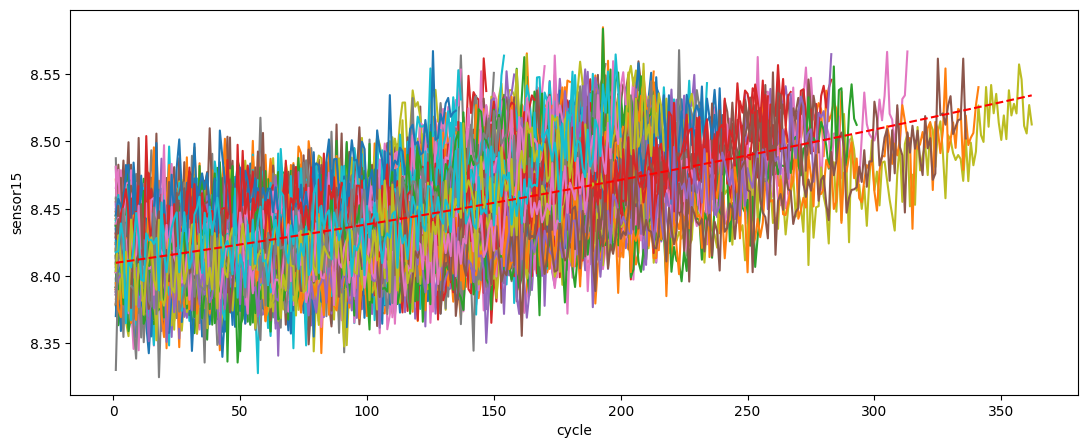

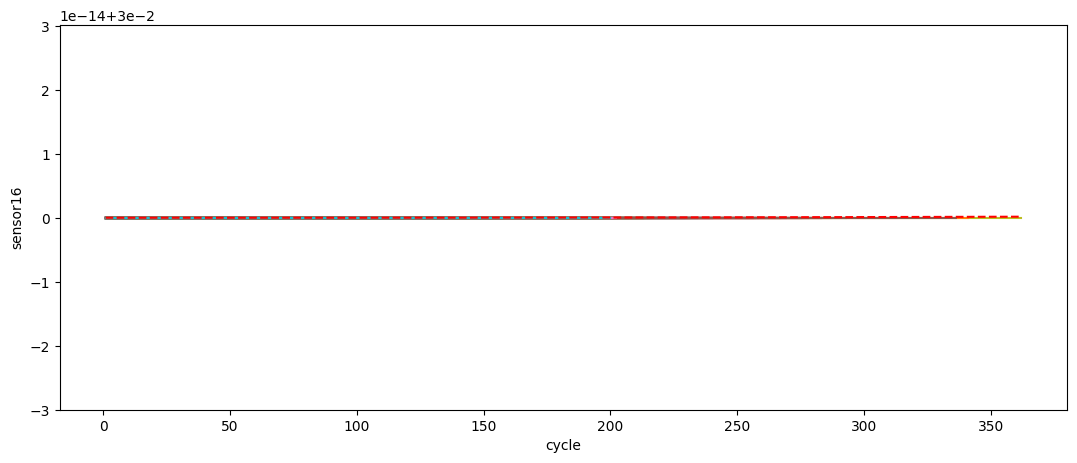

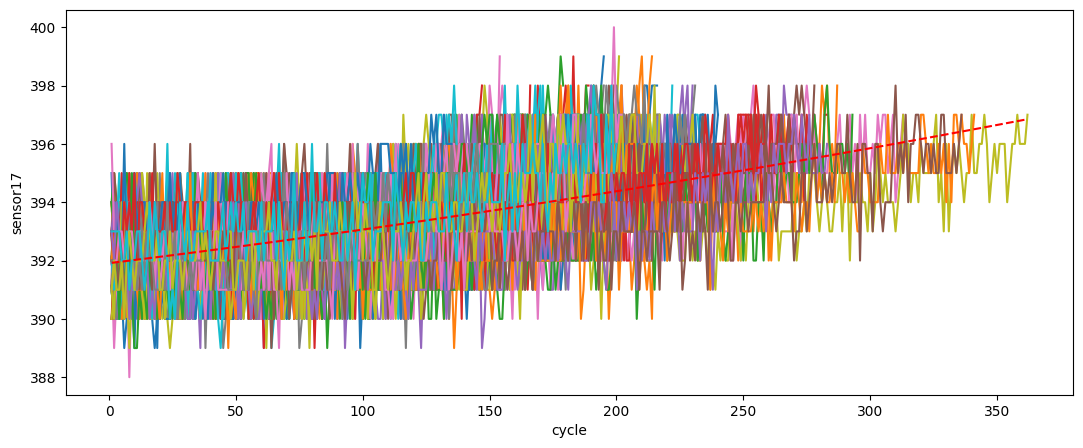

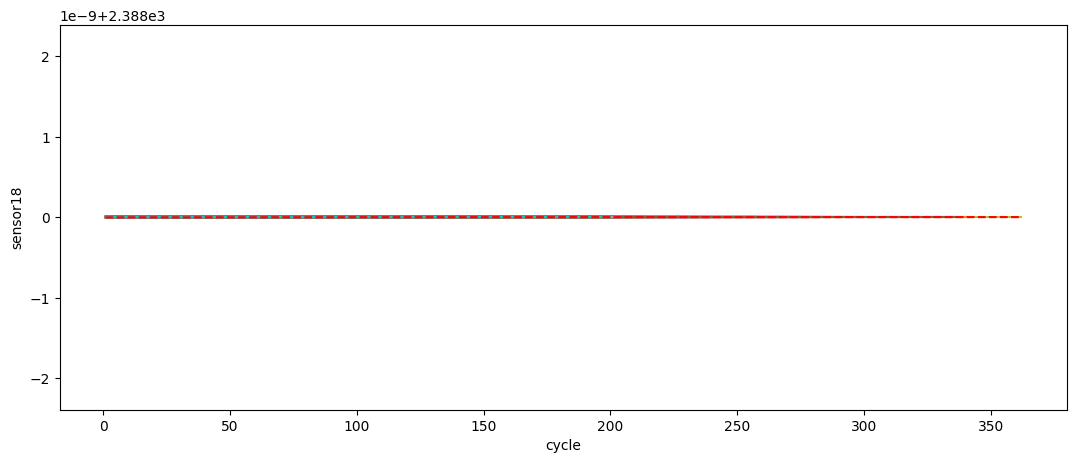

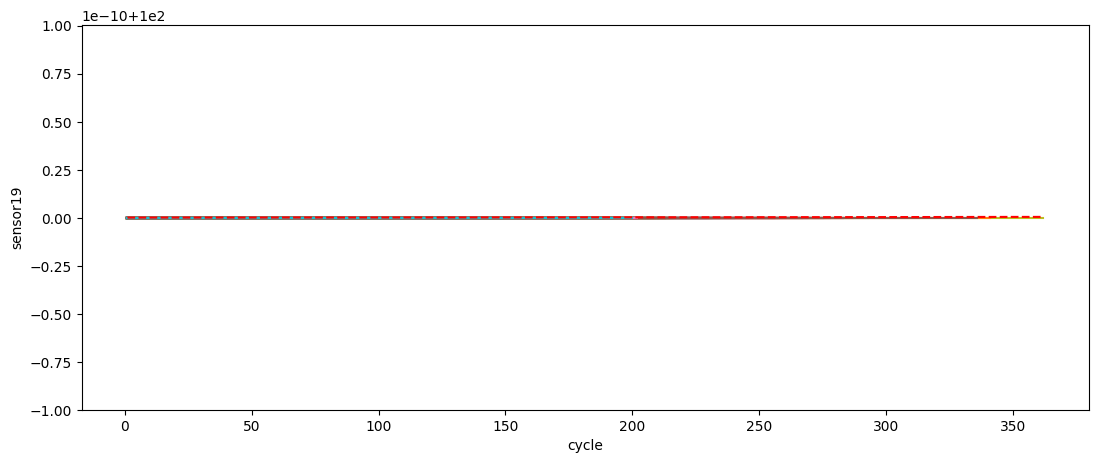

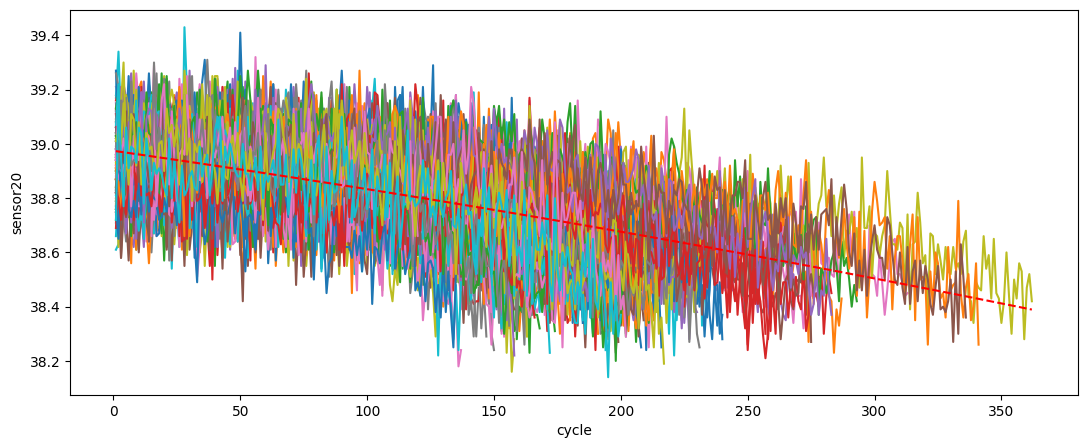

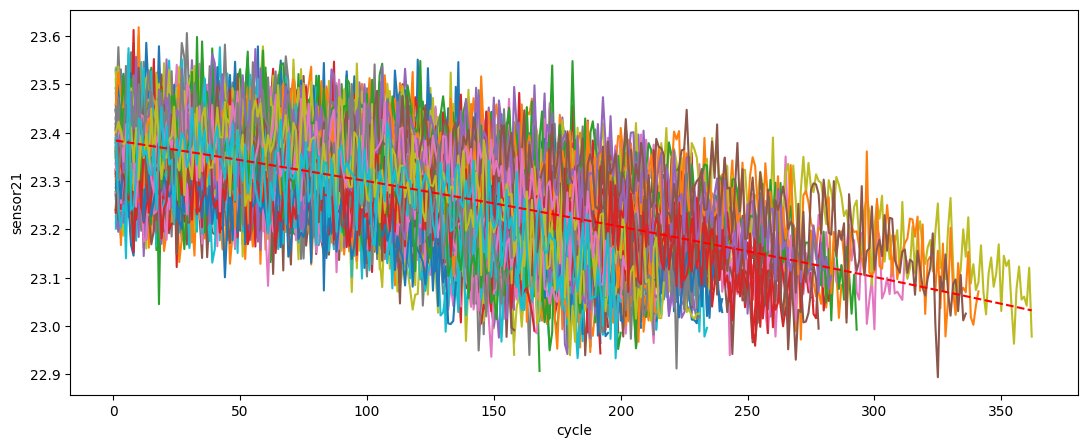

In [ ]:
x_label = 'cycle'

for predictor in data.columns[5:]:
    get_plot_each_sensor(data, x_label, predictor)

**Insight**

*   Plot di atas menampilkan perilaku masing-masing sensor yang diamati dari awal pengamatan suatu mesin sampai mesin failure. Plot ini juga dilengkapi dengan garis trend (trend line) untuk melihat trend data dari suatu sensor dari awal pengamatan mesin sampai mesin tersebut failure.
*   Terlihat ada 3 kondisi yang terjadi pada trend line tersebut. Diantaranya yaitu:

    1. Trend line **semakin naik**. Hal ini menunjukan bahwa semakin tinggi nilai sensor, maka mesin semakin mendekati failure. Contohnya seperti `sensor2`, `sensor3`, `sensor4`, dan lainnya.
    2. Trend line **semakin turun**. Hal ini menunjukan bahwa semakin rendah nilai sensor, maka mesin semakin mendekati failure. Contohnya seperti `sensor7`, `sensor12`, dan lainnya.
    3. Trend line **konstan**. Hal ini menunjukan bahwa tidak ada perubahan data dari suatu sensor dari awal mesin dioperasikan sampai mesin failure. Contohnya seperti `sensor5`, `sensor10`, dan lainnya. Hal ini tidak memberikan kontribusi terhadap model yang akan dibuat nantinya sehingga perlu dilakukan tindakan untuk menangani hal tersebut. Tindakan ini akan dilakukan pada bagian [Data Preparation](#data-preparation).

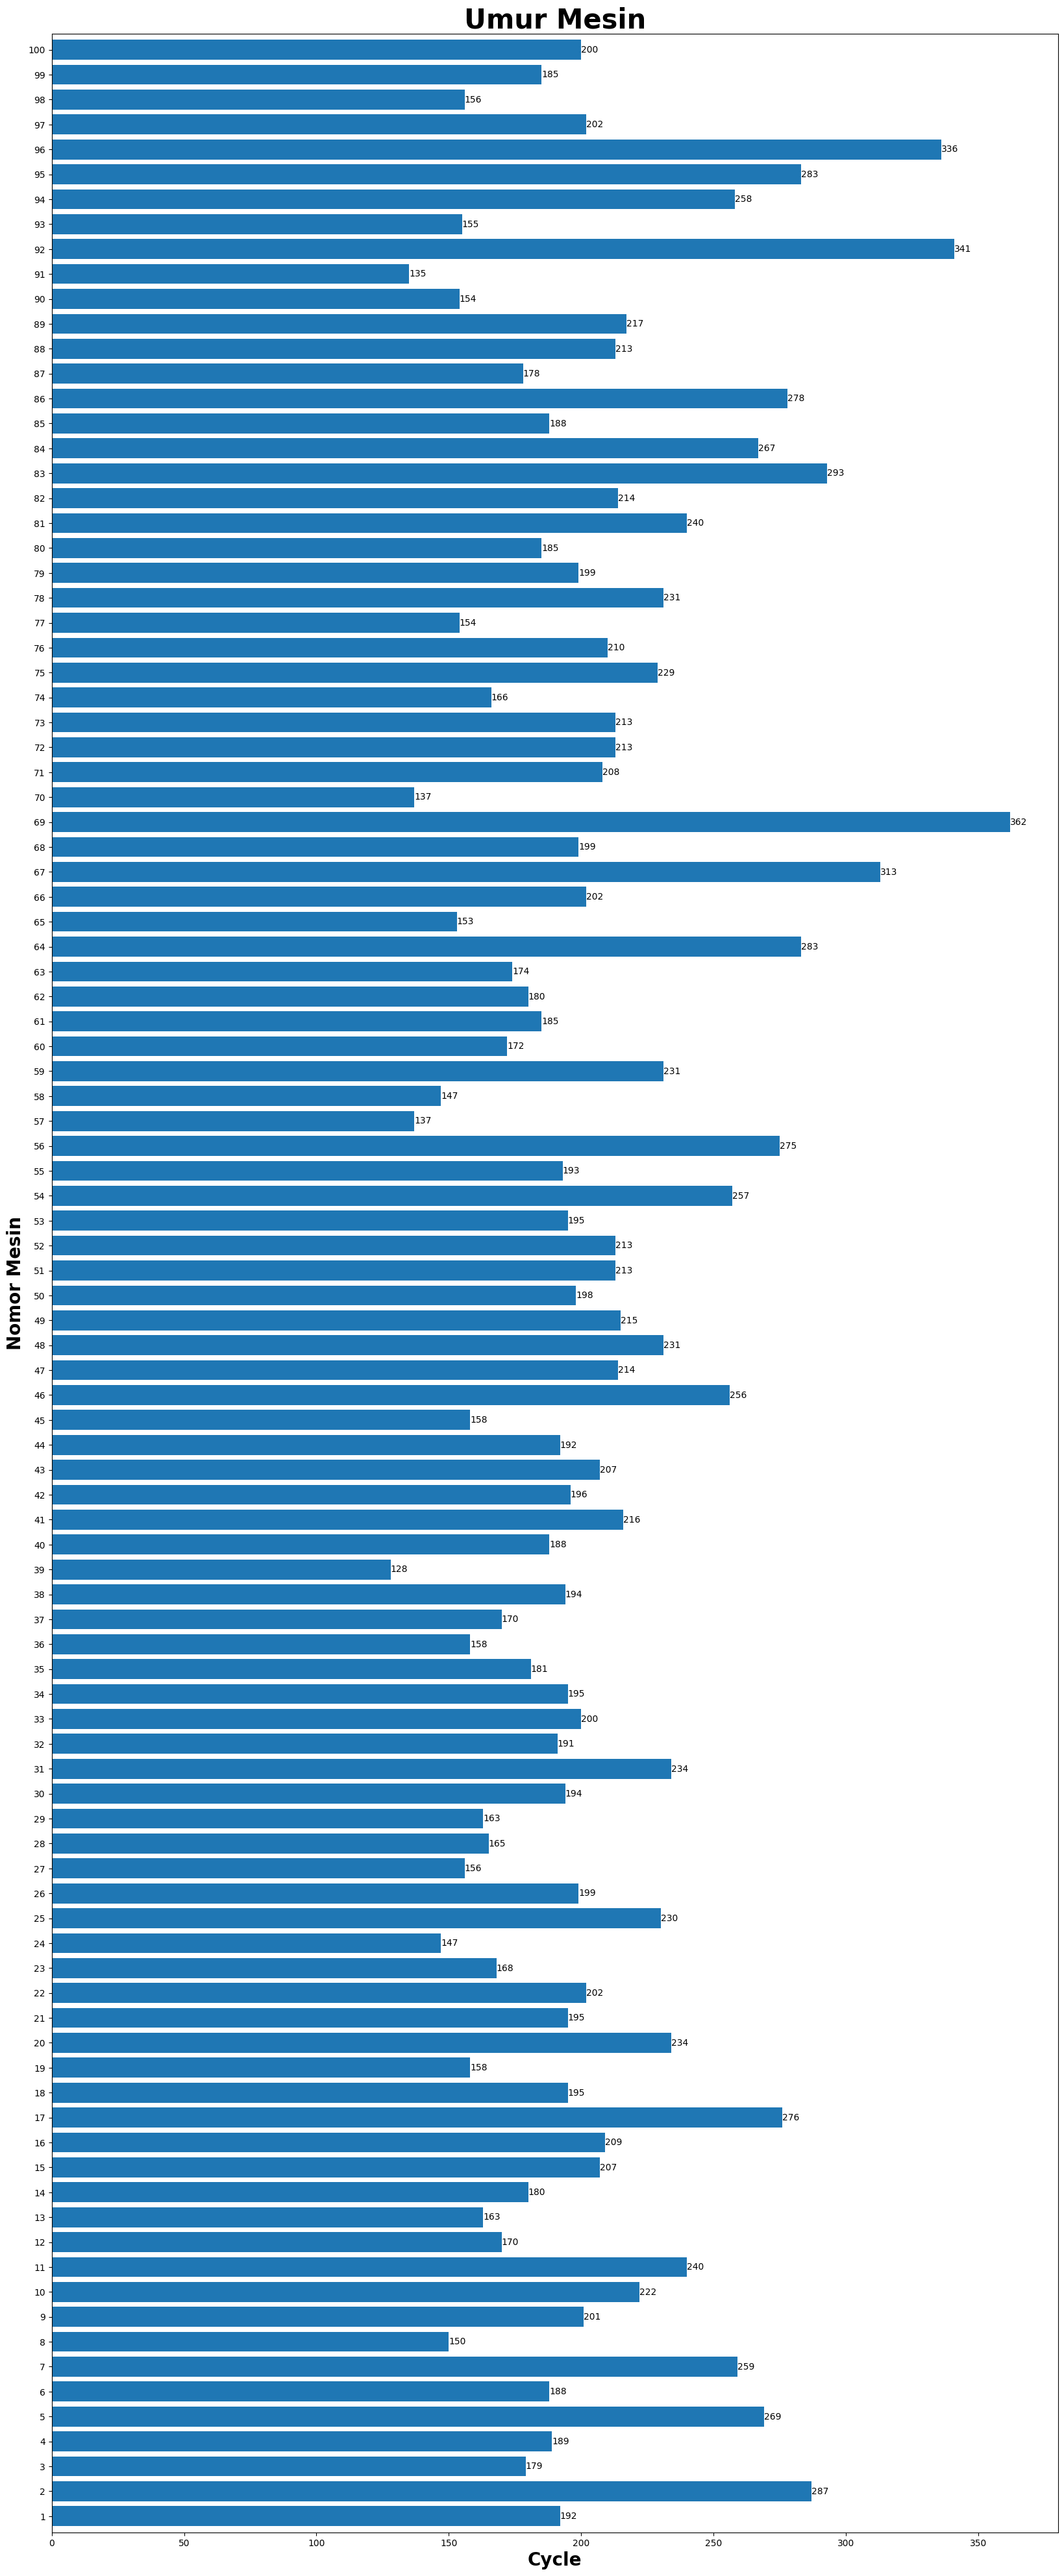

In [ ]:
# Melihat maksimum cycle untuk tiap engine
max_time_cycles = data['cycle'].groupby(data['engine']).max()
plt.figure(figsize=(20, 50))

# Membuat label untuk tiap bar
ax = max_time_cycles.plot(kind='barh', width=0.8, stacked=True, align='center')
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        label = f'{width:.0f}'
        ax.text(width, bar.get_y() + bar.get_height() / 2, label,
                va='center', ha='left', fontsize=10, color='black')

plt.title('Umur Mesin', fontweight='bold', size=30)
plt.xlabel('Cycle', fontweight='bold', size=20)
plt.ylabel('Nomor Mesin', fontweight='bold', size=20)
plt.show()

**Insight**

Dari barplot di atas dapat diketahui bahwa tiap mesin memiliki maksimal cycle yang berbeda-beda. Untuk melihat skewness dari distribusi data dan melihat nilai cycle minimal dan maksimal, perlu dilakukan visualisasi lebih lanjut [di sini](#max-min-cycle).

<a name="data-preparation"></a>
## 4. Data Preparation

**Overview**<hr>

Tahap ini merupakan proses untuk membersihkan data sehingga output dari tahap ini yaitu data yang sudah bersih dan siap digunakan untuk proses pembuatan model *Machine Learning*. Beberapa proses yang dilakukan pada tahap ini diantaranya yaitu:

 * Membersihkan data (membuang nilai NaN, membuang *missing value*, menghapus prediktor yang tidak relevan/seleksi fitur).
 * Membuat label pada dataset.
 * Merubah format data ke bentuk lain sesuai kebutuhan.
 * Membagi dataset menjadi data latih dan data uji.
 * Proses *sampling* untuk mengatasi masalah dataset tidak seimbang.
 * Proses *scaling* untuk menyeragamkan skala nilai antar prediktor sehingga tidak terjadi perbedaan nilai yang terlalu besar yang dapat mempengaruhi performa model.

**Objectives**<hr>

Salah satu tujuan utama pada tahap ini adalah untuk memastikan bahwa data mentah yang diproses untuk penggunaan analitik akurat dan konsisten. Machine learning tidak bisa memproses data kosong (NaN) dan data berupa teks. Selain itu, data yang bernilai besar dan data yang tidak penting akan memperberat komputasi yang dilakukan oleh Machine Learning. Proses preparation ini dilakukan agar data yang akan dilatih menggunakan algoritma Machine Learning merupakan data yang lengkap, mudah diolah, dan bermakna untuk menghasilkan model yang baik.


In [ ]:
# Cek apakah ada nilai NaN pada dataset
data.isnull().sum()

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

**Insight**

Dari data di atas dapat diketahui bahwa dataset telah lengkap dan tidak ada data kosong (NaN) pada dataset sehingga tidak perlu dilakukan proses penanganan missing value.

In [ ]:
# Melihat statistik dari dataset
data.describe().transpose()

count         mean           std        min        25%        50%  \
engine    20631.0    51.506568  2.922763e+01     1.0000    26.0000    52.0000   
cycle     20631.0   108.807862  6.888099e+01     1.0000    52.0000   104.0000   
setting1  20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000   
setting2  20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000   
setting3  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
sensor1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
sensor2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
sensor3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
sensor4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
sensor5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
sensor6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
sensor7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
sensor8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
sensor9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
sensor10  20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
sensor11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
sensor12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
sensor13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
sensor14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
sensor15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
sensor16  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
sensor17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
sensor18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
sensor19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
sensor20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
sensor21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

                75%        max  
engine      77.0000   100.0000  
cycle      156.0000   362.0000  
setting1     0.0015     0.0087  
setting2     0.0003     0.0006  
setting3   100.0000   100.0000  
sensor1    518.6700   518.6700  
sensor2    643.0000   644.5300  
sensor3   1594.3800  1616.9100  
sensor4   1414.5550  1441.4900  
sensor5     14.6200    14.6200  
sensor6     21.6100    21.6100  
sensor7    554.0100   556.0600  
sensor8   2388.1400  2388.5600  
sensor9   9069.4200  9244.5900  
sensor10     1.3000     1.3000  
sensor11    47.7000    48.5300  
sensor12   521.9500   523.3800  
sensor13  2388.1400  2388.5600  
sensor14  8148.3100  8293.7200  
sensor15     8.4656     8.5848  
sensor16     0.0300     0.0300  
sensor17   394.0000   400.0000  
sensor18  2388.0000  2388.0000  
sensor19   100.0000   100.0000  
sensor20    38.9500    39.4300  
sensor21    23.3668    23.6184

**Insight**

Dari data statistik di atas dapat diketahui data-data seperti nilai rata-rata, standar devisasi, data terkecil, data terbesar, Q1, Q2 (Median), Q3, dan jumlah baris dalam dataset. Dari data tersebut juga terlihat bahwa terdapat beberapa prediktor yang memiliki nilai min dan max sama besar. Hal ini menandakan bahwa prediktor tersebut memiliki nilai konstan yaitu nilai yang sama untuk semua baris. Hal ini tidak akan berpengaruh terhadap target sehingga perlu dilakukan proses lanjutan untuk menghapus prediktor tersebut untuk mengurangi beban komputasi.

In [ ]:
def drop_constant_value(dataframe):
    '''
    Function:
        - Untuk menghapus kolom bernilai konstan pada dataset.
        - Nilai konstan yaitu nilai yang sama untuk setiap data pada dataset.
        - Nilai dianggap konstan jika nilai terkecil (min) dan tertinggi (max) pada kolom tersebut sama.
    Args:
        dataframe -> dataset yang akan dicek
    Return:
        dataframe -> dataset yang sudah bersih dari nilai konstan
    '''

    # Membuat variabel penampung untuk menampung kolom bernilai konstan
    constant_column = []

    # Proses mencari nilai konstan dengan melihat nilai min dan max
    for col in dataframe.columns:
        min = dataframe[col].min()
        max = dataframe[col].max()

        # Jika nilai min dan max sama, maka masukkan nama kolom ke variabel penampung
        if min == max:
            constant_column.append(col)

    # Menghapus kolom bernilai konstan pada dataset
    dataframe.drop(columns=constant_column, inplace=True)

    # Mengembalikan dataset yang bersih dari nilai konstan
    return dataframe

In [ ]:
# Menghapus nilai konstan pada dataframe untuk data train
data = drop_constant_value(data)
data

engine  cycle  setting1  setting2  sensor2  sensor3  sensor4  sensor6  \
0           1      1   -0.0007   -0.0004   641.82  1589.70  1400.60    21.61   
1           1      2    0.0019   -0.0003   642.15  1591.82  1403.14    21.61   
2           1      3   -0.0043    0.0003   642.35  1587.99  1404.20    21.61   
3           1      4    0.0007    0.0000   642.35  1582.79  1401.87    21.61   
4           1      5   -0.0019   -0.0002   642.37  1582.85  1406.22    21.61   
...       ...    ...       ...       ...      ...      ...      ...      ...   
20626     100    196   -0.0004   -0.0003   643.49  1597.98  1428.63    21.61   
20627     100    197   -0.0016   -0.0005   643.54  1604.50  1433.58    21.61   
20628     100    198    0.0004    0.0000   643.42  1602.46  1428.18    21.61   
20629     100    199   -0.0011    0.0003   643.23  1605.26  1426.53    21.61   
20630     100    200   -0.0032   -0.0005   643.85  1600.38  1432.14    21.61   

       sensor7  sensor8  sensor9  sensor11  sensor12  sensor13  sensor14  \
0       554.36  2388.06  9046.19     47.47    521.66   2388.02   8138.62   
1       553.75  2388.04  9044.07     47.49    522.28   2388.07   8131.49   
2       554.26  2388.08  9052.94     47.27    522.42   2388.03   8133.23   
3       554.45  2388.11  9049.48     47.13    522.86   2388.08   8133.83   
4       554.00  2388.06  9055.15     47.28    522.19   2388.04   8133.80   
...        ...      ...      ...       ...       ...       ...       ...   
20626   551.43  2388.19  9065.52     48.07    519.49   2388.26   8137.60   
20627   550.86  2388.23  9065.11     48.04    519.68   2388.22   8136.50   
20628   550.94  2388.24  9065.90     48.09    520.01   2388.24   8141.05   
20629   550.68  2388.25  9073.72     48.39    519.67   2388.23   8139.29   
20630   550.79  2388.26  9061.48     48.20    519.30   2388.26   8137.33   

       sensor15  sensor17  sensor20  sensor21  
0        8.4195       392     39.06   23.4190  
1        8.4318       392     39.00   23.4236  
2        8.4178       390     38.95   23.3442  
3        8.3682       392     38.88   23.3739  
4        8.4294       393     38.90   23.4044  
...         ...       ...       ...       ...  
20626    8.4956       397     38.49   22.9735  
20627    8.5139       395     38.30   23.1594  
20628    8.5646       398     38.44   22.9333  
20629    8.5389       395     38.29   23.0640  
20630    8.5036       396     38.37   23.0522  

[20631 rows x 19 columns]

**Insight**

Setelah dilakukan proses penghapusan nilai konstan, data train menyisakan 19 prediktor dari yang semula 26 prediktor. Hal ini menunjukan bahwa terdapat 7 prediktor yang memiliki nilai konstan. Nilai konstan tidak berpengaruh apa-apa terhadap target karena nilainya sama untuk semua baris pada dataset sehingga perlu dihapus.

<a name="max-min-cycle"></a>

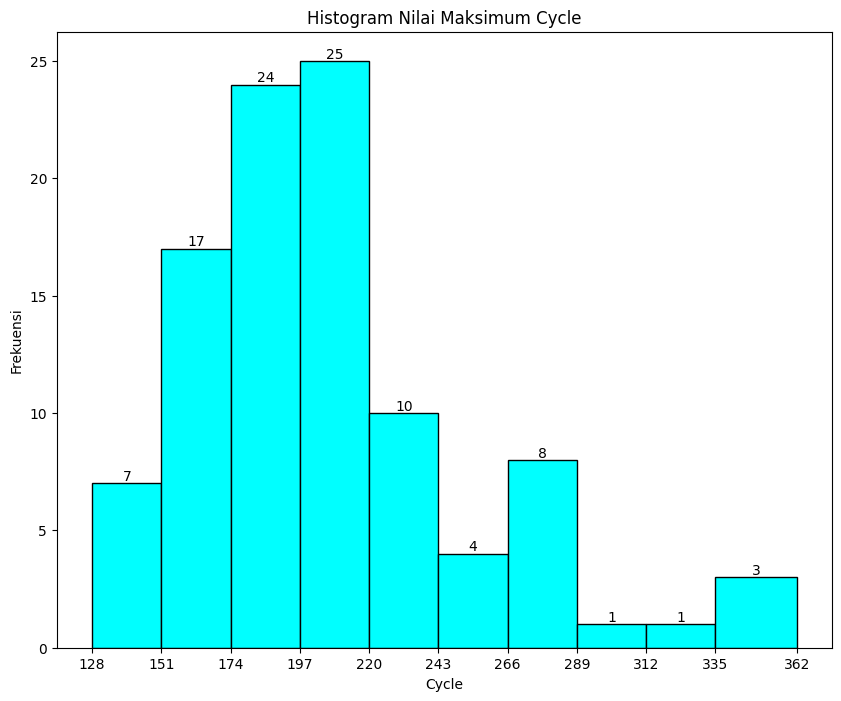

In [ ]:
# Visualisasi nilai max cycle untuk tiap mesin pada data train
df_max_cycle = data[['engine', 'cycle']].groupby('engine').max().reset_index()

# Menentukan ukuran plot
plt.figure(figsize=(10, 8))

# Menghitung lebar bins
bins_count = 10
max_value = df_max_cycle['cycle'].max()
min_value = df_max_cycle['cycle'].min()
bins_width = round((max_value - min_value) / bins_count)
bins_list = []

# Membuat list lebar bins
for i in range(bins_count):
    bins_list.append(min_value)
    min_value += bins_width

    if i+1 == bins_count:
        bins_list.append(max_value)

# Menentukan frekuensi RUL berdasarkan data bins (bins => pembagian kategori)
values, bins, bars = plt.hist(df_max_cycle['cycle'], bins=bins_list, color='cyan', edgecolor='black')
plt.xticks(bins)

# Mengatur label pada plot
plt.title("Histogram Nilai Maksimum Cycle")
plt.xlabel('Cycle')
plt.ylabel('Frekuensi')
plt.bar_label(bars)
plt.show()

**Insight**

Dari histogram di atas dapat diketahui bahwa maksimal cycle terendah yaitu 128 cycle dan tertinggi yaitu 362 cycle. Dari hasil histogram juga diketahui bahwa nilai maksimal cycle cenderung miring ke arah kiri atau ke arah minimal. Hal ini menandakan bahwa kebanyakan mesin memiliki maksimal cycle antara 128 - 220.

In [ ]:
def assign_label(data, threshold):
    '''
    Function:
        - Untuk memberi label pada dataset
    Args:
        - data -> dataset yang akan diberi label
        - threshold -> nilai ambang batas cycle sebelum failure
    Return:
        - data -> dataset yang sudah diberi label
    '''

    for i in range(1, 101):
        # Mencari nilai maksimal cycle tiap engine
        max_cycle = data.loc[(data['engine'] == i), 'cycle'].max()

        # Menentukan cycle ke berapa yang harus berlabel 1 (failure)
        start_warning = max_cycle - threshold

        # Proses assign label 1 ke dataset
        data.loc[(data['engine'] == i) & (data['cycle'] > start_warning), 'status'] = 1

    # Proses assign label 0 ke dataset
    data['status'].fillna(0, inplace=True)

    # Mengembalikan dataset yang telah diberi label
    return data

In [ ]:
# Menentukan nilai threshold untuk labeling
threshold = 20
data = assign_label(data, threshold)
data

engine  cycle  setting1  setting2  sensor2  sensor3  sensor4  sensor6  \
0           1      1   -0.0007   -0.0004   641.82  1589.70  1400.60    21.61   
1           1      2    0.0019   -0.0003   642.15  1591.82  1403.14    21.61   
2           1      3   -0.0043    0.0003   642.35  1587.99  1404.20    21.61   
3           1      4    0.0007    0.0000   642.35  1582.79  1401.87    21.61   
4           1      5   -0.0019   -0.0002   642.37  1582.85  1406.22    21.61   
...       ...    ...       ...       ...      ...      ...      ...      ...   
20626     100    196   -0.0004   -0.0003   643.49  1597.98  1428.63    21.61   
20627     100    197   -0.0016   -0.0005   643.54  1604.50  1433.58    21.61   
20628     100    198    0.0004    0.0000   643.42  1602.46  1428.18    21.61   
20629     100    199   -0.0011    0.0003   643.23  1605.26  1426.53    21.61   
20630     100    200   -0.0032   -0.0005   643.85  1600.38  1432.14    21.61   

       sensor7  sensor8  sensor9  sensor11  sensor12  sensor13  sensor14  \
0       554.36  2388.06  9046.19     47.47    521.66   2388.02   8138.62   
1       553.75  2388.04  9044.07     47.49    522.28   2388.07   8131.49   
2       554.26  2388.08  9052.94     47.27    522.42   2388.03   8133.23   
3       554.45  2388.11  9049.48     47.13    522.86   2388.08   8133.83   
4       554.00  2388.06  9055.15     47.28    522.19   2388.04   8133.80   
...        ...      ...      ...       ...       ...       ...       ...   
20626   551.43  2388.19  9065.52     48.07    519.49   2388.26   8137.60   
20627   550.86  2388.23  9065.11     48.04    519.68   2388.22   8136.50   
20628   550.94  2388.24  9065.90     48.09    520.01   2388.24   8141.05   
20629   550.68  2388.25  9073.72     48.39    519.67   2388.23   8139.29   
20630   550.79  2388.26  9061.48     48.20    519.30   2388.26   8137.33   

       sensor15  sensor17  sensor20  sensor21  status  
0        8.4195       392     39.06   23.4190     0.0  
1        8.4318       392     39.00   23.4236     0.0  
2        8.4178       390     38.95   23.3442     0.0  
3        8.3682       392     38.88   23.3739     0.0  
4        8.4294       393     38.90   23.4044     0.0  
...         ...       ...       ...       ...     ...  
20626    8.4956       397     38.49   22.9735     1.0  
20627    8.5139       395     38.30   23.1594     1.0  
20628    8.5646       398     38.44   22.9333     1.0  
20629    8.5389       395     38.29   23.0640     1.0  
20630    8.5036       396     38.37   23.0522     1.0  

[20631 rows x 20 columns]

**Insight**

Untuk menentukan label apakah suatu cycle sudah masuk kategori *failure* atau masih normal, digunakan nilai threshold 20. Artinya, untuk setiap mesin jika nilai cycle nya sudah mencapai `(maksimal cycle - threshold)`, maka cycle tersebut akan dilabeli sebagai *failure*. Misalnya, engine 1 memilili maksimal cycle 120. Maka cycle 101 s.d. 120 akan dilabeli sebagai *failure*. Hal ini dilakukan untuk mencegah mesin benar-benar mati sehingga dapat dilakukan perawatan dan persiapan penggantian mesin lebih dini.

**Alasan Penambahan Label & Pemilihan Nilai Threshold**

* Menggunakan pendekatan klasifikasi daripada klastering karena tujuan proyek ini adalah memprediksi apakah mesin normal atau *failure* **TETAPI** dengan pemberian peringatan awal. Karena jika mesin sudah failure, maka tidak perlu dilakukan prediksi. Secara nyata mesin *failure* sudah terlihat. Karena mengambil pendekatan klasifikasi, maka diperlukan penambahan label.
* Pemilihan threshold sebesar 20 artinya proyek ini akan memberikan peringatan dini selama 20 cycle sebelum mesin benar-benar *failure*. Nilai ini bias dan subjektif. Nilai ini bisa disesuaikan dengan kebutuhan user. Sehingga harapannya user dapat memberikan perhatian lebih berupa persiapan penggantian atau maintenance terhadap mesin yang diprediksi *failure* (sebenarnya belum failure, tetapi 20 cycle lagi diprediksi sudah failure).

0:  18631  data
1:  2000  data


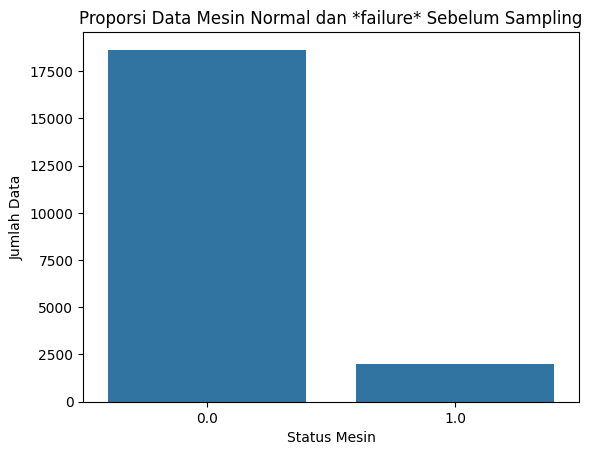

In [ ]:
# cek proporsi antara mesin normal (0) dan failure (1)
sns.countplot(x='status', data=data)
plt.title("Proporsi Data Mesin Normal dan failure Sebelum Sampling")
plt.xlabel('Status Mesin')
plt.ylabel('Jumlah Data')

print("0: ", len(data[data['status'] == 0]), " data")
print("1: ", len(data[data['status'] == 1]), " data")

**Insight**

Dari data barplot di atas dapat diketahui bahwa data cycle mesin yang tergolong normal sejumlah 18.631 cycle dan *failure* sejumlah 2.000 cycle. Dari jumlah tersebut dapat dikatakan bahwa proporsi nilai minoritas yaitu 9.7% dari total data dalam dataset. Merujuk pada sumber dari [google](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data), proporsi tersebut masuk pada kategori moderate sehingga perlu dilakukan proses sampling untuk menambah data pada data minoritas.

Text(0.5, 1.0, 'Heatmap Nilai Korelasi Antar Fitur')

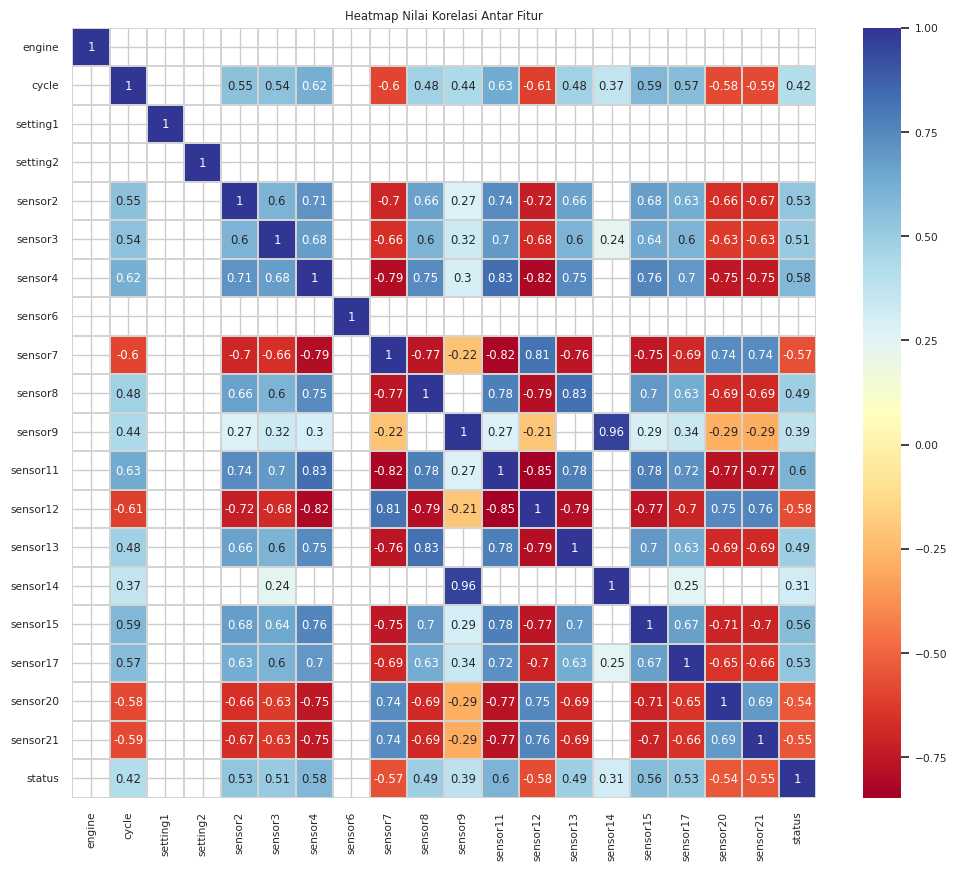

In [ ]:
# Heatmap untuk mengecek korelasi antar fitur dengan threshold
threshold = 0.2
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.set_style("whitegrid", {"axes.facecolor": ".0"})

cluster = data.corr()
mask = cluster.where((abs(cluster) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.title("Heatmap Nilai Korelasi Antar Fitur")

**Insight**

Dari tabel heatmap di atas, hanya prediktor yang memiliki nilai absolut korelasi lebih dari atau sama dengan threshold yang akan ditampilkan. Nilai theshold 0.2 digunakan karena nilai korelasi yang di atas angka 0.2 merupakan korelasi yang cukup kuat. Sedangkan di bawah 0.2 masuk kategori sangat lemah sehingga tidak perlu digunakan. Nilai negatif menunjukan bahwa prediktor tersebut memiliki korelasi yang berkebalikan dengan prediktor lainnya. Misalnya sensor 2 dan sensor 7 yang memiliki nilai korelasi -0.7. Artinya, ketika nilai pada sensor 2 meningkat maka nilai sensor 7 akan menurun dan sebaliknya. Semakin tinggi nilai korelasi, maka saling mempengaruhi satu sama lain. Nilai absolut nilai korelasi yaitu antara 0 s.d. 1. Nilai 0 artinya tidak korelasi sedangkan 1 artinya korelasi sangat kuat.

In [ ]:
# Menampilkan fitur yang memiliki nilai korelasi terhadap target >= nilai threshold
correlation = data.corr()
relevant_features = correlation[abs(correlation['status']) >= threshold]
relevant_features['status']

cycle       0.418602
sensor2     0.526491
sensor3     0.508912
sensor4     0.582934
sensor7    -0.565367
sensor8     0.494334
sensor9     0.385557
sensor11    0.600408
sensor12   -0.577070
sensor13    0.491833
sensor14    0.313872
sensor15    0.561315
sensor17    0.525363
sensor20   -0.540980
sensor21   -0.547923
status      1.000000
Name: status, dtype: float64

In [ ]:
# Mengambil fitur yang relevan (nilai korelasi >= threshold)
list_relevant_features = list(relevant_features.index[1:])

# Pertahankan fitur yang relevan dan hapus sisanya
data = data[list_relevant_features]
data

sensor2  sensor3  sensor4  sensor7  sensor8  sensor9  sensor11  \
0       641.82  1589.70  1400.60   554.36  2388.06  9046.19     47.47   
1       642.15  1591.82  1403.14   553.75  2388.04  9044.07     47.49   
2       642.35  1587.99  1404.20   554.26  2388.08  9052.94     47.27   
3       642.35  1582.79  1401.87   554.45  2388.11  9049.48     47.13   
4       642.37  1582.85  1406.22   554.00  2388.06  9055.15     47.28   
...        ...      ...      ...      ...      ...      ...       ...   
20626   643.49  1597.98  1428.63   551.43  2388.19  9065.52     48.07   
20627   643.54  1604.50  1433.58   550.86  2388.23  9065.11     48.04   
20628   643.42  1602.46  1428.18   550.94  2388.24  9065.90     48.09   
20629   643.23  1605.26  1426.53   550.68  2388.25  9073.72     48.39   
20630   643.85  1600.38  1432.14   550.79  2388.26  9061.48     48.20   

       sensor12  sensor13  sensor14  sensor15  sensor17  sensor20  sensor21  \
0        521.66   2388.02   8138.62    8.4195       392     39.06   23.4190   
1        522.28   2388.07   8131.49    8.4318       392     39.00   23.4236   
2        522.42   2388.03   8133.23    8.4178       390     38.95   23.3442   
3        522.86   2388.08   8133.83    8.3682       392     38.88   23.3739   
4        522.19   2388.04   8133.80    8.4294       393     38.90   23.4044   
...         ...       ...       ...       ...       ...       ...       ...   
20626    519.49   2388.26   8137.60    8.4956       397     38.49   22.9735   
20627    519.68   2388.22   8136.50    8.5139       395     38.30   23.1594   
20628    520.01   2388.24   8141.05    8.5646       398     38.44   22.9333   
20629    519.67   2388.23   8139.29    8.5389       395     38.29   23.0640   
20630    519.30   2388.26   8137.33    8.5036       396     38.37   23.0522   

       status  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
20626     1.0  
20627     1.0  
20628     1.0  
20629     1.0  
20630     1.0  

[20631 rows x 15 columns]

**Insight**

Dari proses seleksi fitur di atas, dapat disimpulkan bahwa terdapat 14 prediktor dan 1 target yang akan digunakan untuk proses modeling. Pemilihan prediktor ini didasarkan pada seberapa berpengaruh prediktor tersebut terhadap target dengan nilai threshold korelasi 0.2. Angka 0.2 ke atas menandakan bahwa prediktor tersebut memiliki korelasi yang cukup kuat terhadap target.

In [ ]:
# Memisah dataset menjadi prediktor (X) dan target (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# Membagi dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Mengubah y_train ke bentuk 1 dimensi
y_train = y_train.squeeze()

In [ ]:
# Cek jumlah data untuk training dan testing
print("Shape of train : ", X_train.shape)
print("Shape of test  : ", X_test.shape)

Shape of train :  (16504, 14)
Shape of test  :  (4127, 14)


In [ ]:
# Cek jumlah cycle mesin normal dan failure pada testing
print("Cycle normal (aktual)  : ", y_test.value_counts()[0])
print("Cycle failure (aktual) : ", y_test.value_counts()[1])

Cycle normal (aktual)  :  3770
Cycle *failure* (aktual) :  357


**Insight**

*   Proses pembagian dataset menggunakan skema 80:20 artinya 80% data digunakan untuk data train dan 20% data untuk data test. Dari pembagian data tersebut dapat diketahui bahwa jumlah data untuk proses training sebanyak 16.504 data dan jumlah data untuk proses testing sebanyak 4.127 data. Angka 14 menunjukan bahwa terdapat 14 prediktor yang akan dicari polanya selama proses pembelajaran.
*   Dari 4.127 data test yang digunakan, diketahui terdapat 3.770 cycle mesin yang memiliki status normal. Sedangkan 357 cycle mesin memiliki status failure.

0:  18631  data
1:  2000  data


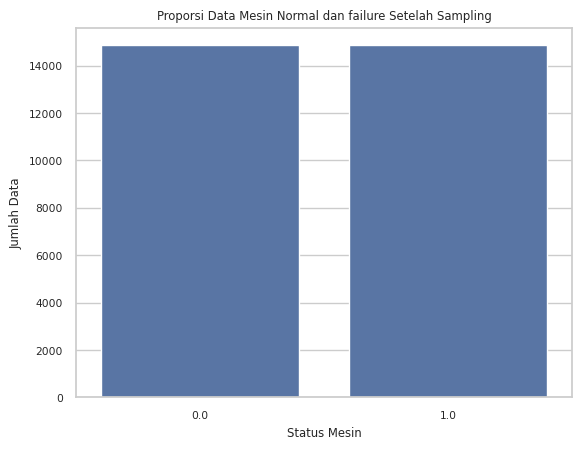

In [ ]:
# Proses oversmapling untuk menangani masalah imbalanced dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("0: ", len(data[data['status'] == 0]), " data")
print("1: ", len(data[data['status'] == 1]), " data")

# Cek proporsi antara mesin normal (0) dan failure (1)
data = X_train
data['status'] = y_train

plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='status', data=data)
plt.title("Proporsi Data Mesin Normal dan failure Setelah Sampling")
plt.xlabel('Status Mesin')
plt.ylabel('Jumlah Data')
plt.show()

**Insight**

Oversampling merupakan proses untuk menambah data sintetis ke dalam kelas minoritas sehingga proporsi antara kedua kelas seimbang. Terlihat pada barplot di atas dapat diketahui bahwa setelah proses oversampling, jumlah data antara mesin normal dan *failure* sudah seimbang dengan masing-masing status memiliki 14.861 data. Hal ini perlu dilakukan agar model tidak sensitif terhadap salah satu kelas saja.

In [ ]:
# Mengubah bentuk X_train menjadi dataframe kembali
X_train = pd.DataFrame(X_train, columns = X.columns)

# Proses scaling untuk menyeragamkan skala nilai antar fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menyimpan variabel scaler untuk proses prediksi pada unseen data
dump(scaler, 'scaler.bin', compress=True)

# Menampilkan data setelah proses scaling
X_train_scaling = pd.DataFrame(X_train, columns = X.columns)
X_train_scaling

sensor2   sensor3   sensor4   sensor7   sensor8   sensor9  sensor11  \
0     -0.938390 -0.556666 -0.909093  0.212688  0.177875 -0.622271 -1.015749   
1     -1.392110 -0.144523 -1.030363  1.533963 -1.576763  0.055578 -1.046601   
2     -1.095447 -2.171478 -1.281174  0.592911 -1.459787 -0.782529 -1.817908   
3     -0.467220 -1.711510 -1.025770  1.524457 -1.342811 -0.519402 -1.324272   
4     -0.606826 -1.057426 -1.002802  0.298238  0.294851 -0.806351 -0.676374   
...         ...       ...       ...       ...       ...       ...       ...   
29717  0.445690  1.209339  0.834500 -0.819891  1.347633 -1.180792  0.415787   
29718  0.957616  1.364339  1.040986 -1.121383  1.268609 -0.059821  0.799902   
29719  0.274123  1.338818  0.614799 -0.441951 -0.496831  1.982762  0.222743   
29720  1.199629  1.536722  0.874485 -0.822968 -0.032885  2.017594  1.380752   
29721  0.933562  2.213714  0.340163 -1.071757 -0.153191  1.880993  0.931628   

       sensor12  sensor13  sensor14  sensor15  sensor17  sensor20  sensor21  
0      0.792598 -0.397959 -0.579051 -0.892908 -0.094989  0.888048  0.960463  
1      2.175096 -1.319749  0.095758 -2.040381 -2.481010  0.746002  0.934275  
2      1.107313 -0.397959 -0.414380 -1.480251 -0.691494  1.456235  0.495435  
3      1.545666 -1.665420 -0.247229 -1.121949 -1.288000  1.124793  1.821479  
4      0.736399  0.178160 -0.679218 -1.072059 -0.691494  0.414559  0.469248  
...         ...       ...       ...       ...       ...       ...       ...  
29717 -0.347741  1.498290 -0.881607  0.491178  1.098022 -0.813797  0.271253  
29718 -1.229398  0.719684  0.102551  1.195119  0.501517 -1.430785 -1.405503  
29719 -0.283947 -0.589316  2.069433  0.583104  0.501517 -0.790301 -0.595673  
29720 -0.790664  0.265570  1.737952  1.163457  1.098022 -1.161015 -0.405578  
29721 -0.742242  0.217289  1.845271  1.369915  1.098022 -1.905538 -0.436191  

[29722 rows x 14 columns]

**Insight**

Dari hasil scaling terlihat bahwa untuk semua prediktor memiliki jangkauan data yang tidak berbeda jauh. Hal ini akan memudahkan dalam proses pembuatan model machine learning dan mengurangi waktu dan resource komputasi yang dibutuhkan.

## 5. Modeling & Evaluation

**Overview**<hr>

Tahap ini merupakan proses untuk membuat model machine learning yang nantinya akan digunakan untuk proses prediksi. Beberapa hal yang dilakukan pada tahap ini yaitu:

*   Memilih algoritma machine learning yang akan digunakan dan tuning hyperparameter.
*   Proses fitting atau proses model belajar.
*   Proses evaluasi model untuk mengetahui performa model.

**Objectives**<hr>

Tahap ini penting dilakukan karena pada tahap ini akan dihasilkan model machine learning yang akan digunakan untuk  memprediksi *unseen data* dengan performa yang baik.




### 5.1 Model *Random Forest*

**Random Forest** merupakan salah satu metode ensemble learning (gabungan). Maksudnya yaitu model yang terdiri dari gabungan beberapa model untuk menghasilkan suatu prediksi. Random Forest terdiri dari gabungan beberapa model Decision Tree (DT). Output prediksi dari setiap DT, akan dilakukan voting. Output yang memiliki nilai vote terbanyak, akan menjadi hasil akhir dari Random Forest.


Random Forest merupakan salah satu algoritma yang tidak interpretable (not interpretable model). Hal ini dikarenakan tiap pohon pada Random Forest terbentuk secara random. Tidak ada formula khusus yang bisa dijadikan pedoman dalam membuat pohon-pohon pada Random Forest. Benar-benar dibuat secara random sehingga tidak diketahui prediktor mana yang paling berpengaruh dan bagaimana cara Random Forest membuat keputusan (prediksi).

Pelajari lebih lanjut mengenai Random Forest pada [link ini](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/).

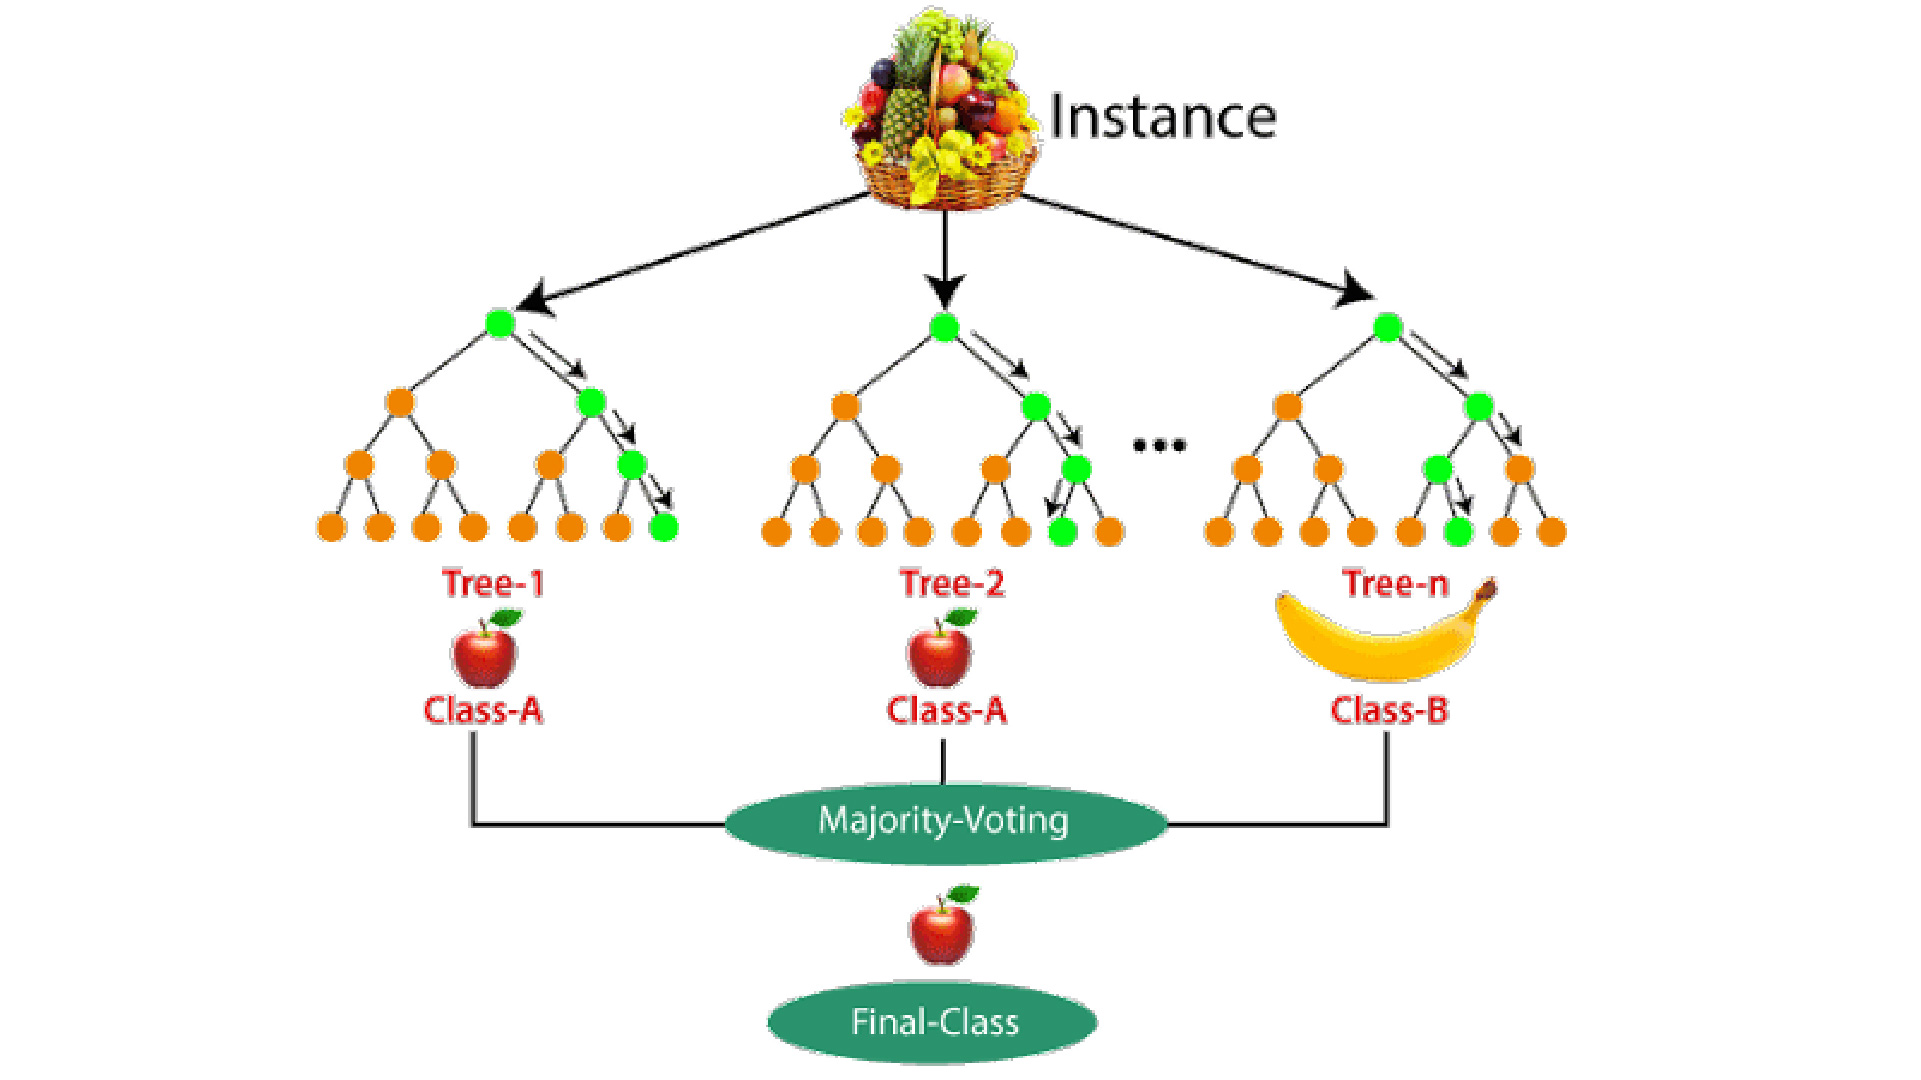

#### 5.1.1 Tuning Hyperparameter

Tahap ini digunakan untuk memilih parameter terbaik. Parameter hasil dari tuning hyperparameter akan digunakan pada proses pembuatan model (training). Tujuan dari tahap ini yaitu menghasilkan parameter terbaik sehingga akan tercipta model yang terbaik juga. Model yang baik yaitu model yang `good fit` yaitu model yang memiliki performa maksimal baik pada data train maupun data test.

Ada beberapa parameter yang akan dituning. Diantaranya yaitu:
1. `n_estimators` => Jumlah pohon (decision tree) yang digunakan.
2. `max_features` => Jumlah maksimal fitur/prediktor pada setiap pohon (decision tree).
3. `max_depth` => Maksimal kedalaman pohon (jalur terpanjang dari *root node* sampai *leaf node*).
4. `max_leaf_nodes` => Maksimal *leaf node* yang akan tercipta. Ini berguna untuk mencegah overfitting karena pertumbuhan pohon yang tidak terkontrol.



In [ ]:
# Mendefinisikan paramter yang akan dituning
param_grid = {
	'n_estimators': [50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3],
	'max_leaf_nodes': [3, 6, 9, None],
}

In [ ]:
# Proses tuning hyperparamter menggunakan fungsi RandomizedSearchCV() dari sklearn
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                 param_grid)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 150, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 3}


#### 5.1.2 Pembuatan Model Random Forest

Parameter terbaik hasil dari tuning hyperparameter telah disimpan pada variabel `best_params`. Kita akan gunakan parameter ini untuk membuat model random forest.

In [ ]:
# Membuat object dari class RandomForestClassifier()
model_rf = RandomForestClassifier(**best_params)

# Proses training
model_rf = model_rf.fit(X_train, y_train)

# Menyimpan model ML untuk proses prediksi pada unseen data
dump(model_rf, 'model_rf.bin', compress=True)

['model_rf.bin']

In [ ]:
# Proses prediksi data train
y_predict_train = model_rf.predict(X_train)

# Proses prediksi data test
y_predict_test = model_rf.predict(X_test)

In [ ]:
# Melihat hasil prediksi dari data train
print("Cycle mesin normal train (prediksi)  : ", pd.Series(y_predict_train).value_counts()[0])
print("Cycle mesin failure train (prediksi) : ", pd.Series(y_predict_train).value_counts()[1])

# Melihat hasil prediksi dari data test
print("Cycle mesin normal test (prediksi)   : ", pd.Series(y_predict_test).value_counts()[0])
print("Cycle mesin failure test (prediksi)  : ", pd.Series(y_predict_test).value_counts()[1])

Cycle mesin normal train (prediksi)  :  14148
Cycle mesin failure train (prediksi) :  15574
Cycle mesin normal test (prediksi)   :  3556
Cycle mesin failure test (prediksi)  :  571


**Insight**

Dari data test yang digunakan, model memprediksi terdapat 3.556 cycle yang berstatus normal dan 571 cycle yang berstatus failure. Nilai ini akan kita cocokan dengan data aktual yaitu y_test untuk mengetahui performa model.



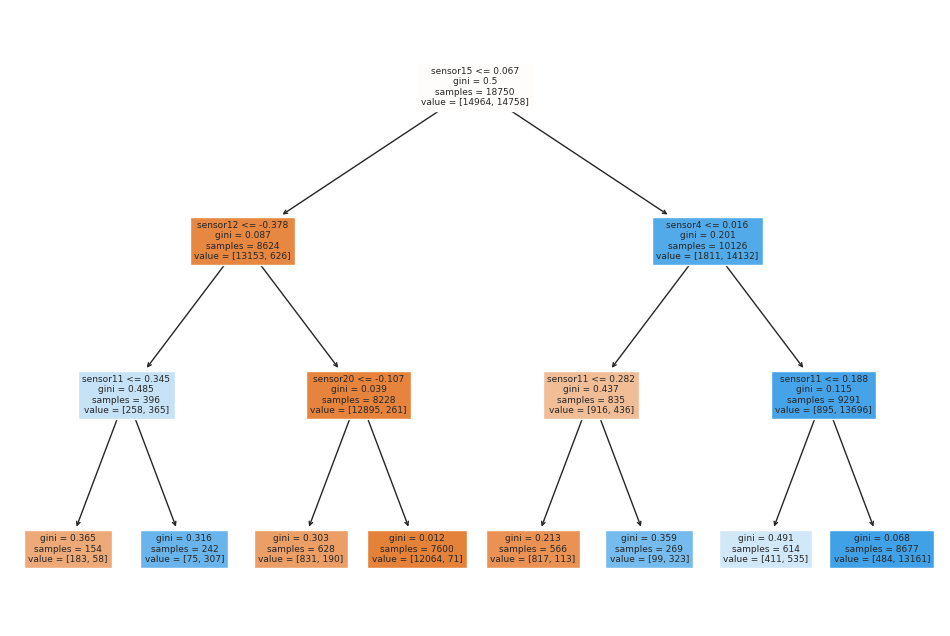

In [ ]:
# Menampilkan visualisasi salah satu decision tree pada random forest
plt.figure(figsize=(12, 8))
visualize = plot_tree(model_rf.estimators_[0], feature_names=data.columns[:-1], filled=True)

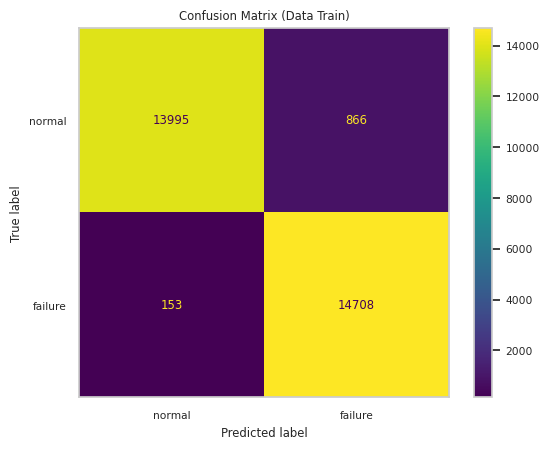

In [ ]:
# Menampilkan tabel confusion matrix pada data train
matrix = metrics.confusion_matrix(y_train, y_predict_train)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.title("Confusion Matrix (Data Train)")
plt.grid(False)
plt.show()

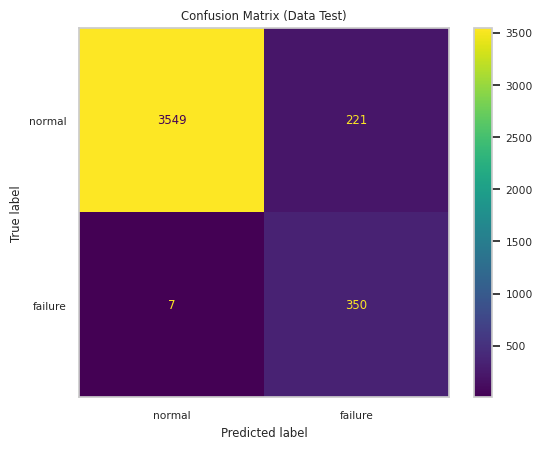

In [ ]:
# Menampilkan tabel confusion matrix pada data test
matrix = metrics.confusion_matrix(y_test, y_predict_test)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.title("Confusion Matrix (Data Test)")
plt.grid(False)
plt.show()

**Insight**

Dari tabel confusion matrix di atas, dapat diketahui hal-hal sebagai berikut:

*   `True Positive (TP)` -> Cycle *failure* yang benar diprediksi *failure*. Ada sebanyak 336 data.
*   `True Negative (TN)` -> Cycle normal yang benar diprediksi normal. Ada sebanyak 3.657 data.
*   `False Positive (FP)` -> Cycle normal yang diprediksi failure. Ada sebanyak 113 data.
*   `False Negative (FN)` -> Cycle *failure* yang diprediksi normal. Ada sebanyak 21 data.





In [ ]:
print("Evaluasi pada Data Train")
print("Accuracy  : ", metrics.accuracy_score(y_train, y_predict_train))
print("Precision : ", metrics.precision_score(y_train, y_predict_train))
print("Recall    : ", metrics.recall_score(y_train, y_predict_train))
print("F1 Score  : ", metrics.f1_score(y_train, y_predict_train))

print("\nEvaluasi pada Data Test")
print("Accuracy  : ", metrics.accuracy_score(y_test, y_predict_test))
print("Precision : ", metrics.precision_score(y_test, y_predict_test))
print("Recall    : ", metrics.recall_score(y_test, y_predict_test))
print("F1 Score  : ", metrics.f1_score(y_test, y_predict_test))

Evaluasi pada Data Train
Accuracy  :  0.9657156315187403
Precision :  0.944394503659946
Recall    :  0.9897045959222125
F1 Score  :  0.9665188105799245

Evaluasi pada Data Test
Accuracy  :  0.944754058638236
Precision :  0.6129597197898424
Recall    :  0.9803921568627451
F1 Score  :  0.7543103448275862


**Insight**

Dari nilai evaluasi di atas, dapat disimpulkan sebagai berikut:

*   Performa model memprediksi data train dan data test mengalami **overfitting**. Hal ini dibuktikan dengan penurunan peforma model pada data test. Namun hal ini masih bisa dipakai mengingat batas toleransi untuk overfitting yaitu < 20%.
*   Nilai `accuracy` menunjukan bahwa model mampu memprediksi 94% data dengan benar. Dengan kata lain, dari 4.127 data uji model dapat dengan benar memprediksi 3.989 data.
*   Nilai `precision` menunjukan bahwa dari semua cycle yang diprediksi *failure* oleh model, ternyata hanya 61% yang benar. Dengan kata lain, dari 449 cycle yang diprediksi *failure* ternyata hanya 336 cycle yang benar-benar berstatus failure. Sisanya berstatus normal.
*   Nilai `recall` menunjukan bahwa dari semua cycle yang aktualnya memang benar-benar berstatus failure, ternyata hanya 98% yang berhasil diprediksi *failure* oleh model. Dengan kata lain, dari 357 cycle yang memang failure, mampu memprediksi dengan benar sebanyak 337 cycle. Hanya 20 cycle berstatus *failure* yang terprediksi normal oleh model.
*   Nilai `F1` menunjukan bahwa model mampu mengenali kondisi cycle mesin masih normal dan *failure* dengan baik. Tidak condong ke salah satu kondisi saja.
*   Pada proyek ini, nilai evaluasi yang menjadi patokan yaitu nilai `recall`.



### 5.2 Model *Artificial Neural Network*

Artificial Neural Network (ANN) merupakan metode pembelajaran mendalam yang muncul dari konsep syaraf biologis otak manusia. ANN adalah salah satu algoritma deep learning yang populer digunakan. Arsitektur ANN terdiri dari
- **Input layer**: layer yang menerima data prediktor, jumlah neuron = jumlah prediktor
- **Output layer**: layer yang berisi nilai prediksi, jumlah neuron berdasarkan target
- **Hidden layer**: layer yang berisi hasil perhitungan, memproses informasi dari input ke output
    - Jumlah hidden layer ditentukan oleh pembuat model
    - Jumlah neuron dalam hidden layer ditentukan oleh pembuat model
    - Jumlah neuron dalam tiap hidden layer dapat berbeda-beda
    - Semakin banyak hidden layer & neuron, model semakin kompleks

    
Neural Network belajar sesuai dengan tahap-tahap berikut

1. Random weight & bias initialization
2. Feedforward
3. Error calculation
4. Backpropagation
5. Ulangi 2-4 hingga error seminimal mungkin

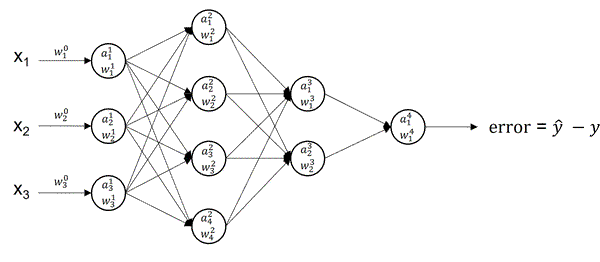

In [ ]:
# Membuat arsitektur model NN
def build_model(hp):
    model = Sequential()

    # hidden layer pertama
    model.add(Dense(
        units=hp.Choice('hidden_1', values=[16, 32, 64, 128, 256, 512]),
        activation='tanh',
        kernel_regularizer=l2(0.01),
        input_dim=X_train.shape[1])
    )

    # hidden layer kedua
    model.add(Dense(
        units=hp.Choice('hidden_2', values=[16, 32, 64, 128, 256, 512]),
        activation='tanh',
        kernel_regularizer=l2(0.01))
    )

    # hidden layer ketiga
    model.add(Dense(
        units=hp.Choice('hidden_3', values=[16, 32, 64, 128, 256, 512]),
        activation='tanh',
        kernel_regularizer=l2(0.01))
    )

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # set learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

    # proses compile model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # mengembalikan arsitektur model
    return model

# Setting library tuner
tuner = kt.RandomSearch(
    build_model,
    objective='loss',
    max_trials=15,
    executions_per_trial=1
)

# Membuat objek dari class EarlyStopping()
earlystopper = EarlyStopping(
    monitor = 'loss',
    patience = 2,
    verbose= 1
)

# Proses tuning hyperparameter
tuner.search(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    callbacks = [earlystopper]
)

# Get hyperparameter dan model terbaik
best_hyperparameters = tuner.get_best_hyperparameters()[0]
model_ann = tuner.hypermodel.build(best_hyperparameters)

Trial 15 Complete [00h 00m 32s]
loss: 0.1057124212384224

Best loss So Far: 0.09663697332143784
Total elapsed time: 00h 17m 04s


In [ ]:
# Menampilkan hyperparameter terbaik hasil tuning
print(tuner.get_best_hyperparameters()[0].values)

{'hidden_1': 128, 'hidden_2': 16, 'hidden_3': 512, 'learning_rate': 0.0001}


In [ ]:
# Melakukan training ulang dengan hyperparameter terbaik hasil tuning
history = model_ann.fit(
    X_train,
    y_train,
    epochs=150,
    validation_split=0.2,
    callbacks = [earlystopper])
history_dict = history.history

Epoch 1/150
744/744 [==============================] - 3s 3ms/step - loss: 0.7840 - accuracy: 0.9543 - val_loss: 0.5110 - val_accuracy: 0.9822
Epoch 2/150
744/744 [==============================] - 2s 3ms/step - loss: 0.3831 - accuracy: 0.9647 - val_loss: 0.2899 - val_accuracy: 0.9739
Epoch 3/150
744/744 [==============================] - 2s 3ms/step - loss: 0.2274 - accuracy: 0.9656 - val_loss: 0.1940 - val_accuracy: 0.9733
Epoch 4/150
744/744 [==============================] - 2s 3ms/step - loss: 0.1641 - accuracy: 0.9648 - val_loss: 0.1433 - val_accuracy: 0.9763
Epoch 5/150
744/744 [==============================] - 4s 5ms/step - loss: 0.1378 - accuracy: 0.9654 - val_loss: 0.1400 - val_accuracy: 0.9701
Epoch 6/150
744/744 [==============================] - 2s 3ms/step - loss: 0.1263 - accuracy: 0.9656 - val_loss: 0.1267 - val_accuracy: 0.9726
Epoch 7/150
744/744 [==============================] - 2s 3ms/step - loss: 0.1200 - accuracy: 0.9655 - val_loss: 0.1132 - val_accuracy: 0.9754

**Catatan**

Secara umum, proses pembelajaran (training) pada neural network terdiri dari 2 proses utama yaitu forward dan backward.


*   `Forward` => Proses untuk menghasilkan nilai output. Proses ini dimulai dari input layer > hidden layer > output layer. Di layer output, kemudian dilakukan proses perhitungan nilai loss untuk mengetahui nilai error. Seberapa jauh nilai prediksi dengan nilai aktualnya. Jika nilai error lebih besar dari ambang batas yang ditentukan, maka dilakukan proses backward.
*  `Backward` => Proses untuk mengupdate bobot. Jika nilai error yang dihasilkan terlalu besar, maka dilakukan proses backward untuk mengupdate bobot pada tiap neuron pada tiap layer. Proses ini dilakukan dalam rangka menurunkan nilai error yang dihasilkan.



Penjelasan dari beberapa istilah:


*   `Learning rate` => Seberapa besar bobot pada neuron berubah selama proses training dalam rangka meminimalkan nilai error. Nilai LR memiliki range antara 0 s.d. 1. Semakin besar nilai LR, semakin cepat proses training. Begitupun sebaliknya semakin kecil nilai LR, maka proses training semakin lambat. Diperlukan` tuning hyperparameter `untuk mencari nilai LR yang tepat.
*   `Epochs` => Hyperparameter yang menentukan berapa kali algoritma deep learning bekerja melewati seluruh dataset baik secara forward (maju) maupun backward (mundur). Forward berfungsi untuk menentukan nilai prediksi/output. Sedangkan backward berfungsi untuk mengupdate bobot jika nilai error yang dihasilkan dari proses forward terlalu besar (melebihi threshold).
*   `Batch size` => Merupakan jumlah sampel data yang disebarkan ke Neural Network. Misalnya ada 100 data dan memiliki batch size 10. Maka 10 data pertama akan disebarkan ke neural network untuk proses pembelajaran. Kemudian 10 data berikutnya. Begitu seterusnya sampai 100 data tersebar semua. Setiap 1x data tersebar semua, maka dianggap 1 epochs.
*   `Optimizer` => Fungsi yang digunakan untuk melakukan update bobot pada proses backward. Nilai bobot ini perlu diupdate dalam rangka meminimalkan nilai error. Contoh: `Adam`, `Stochastic Gradient Descent (SGD)`
*   `Loss` => Fungsi yang digunakan untuk menghitung nilai error. Jika nilai error > threshold, maka akan dilakukan proses backward untuk mengupdate bobot. Proses forward dan backward ini dilakukan secara terus menerus sampai tercapai 2 kondisi yaitu tercapainya maksimal epochs atau nilai error < threshold yang ditentukan. Contoh: `Binary Cross Entropy` (klasifikasi), `Mean Absolute Error (MAE)` (regresi)



**Insight**

Algoritma Neural Network yang digunakan memiliki arsitektur sebagai berikut:

*   Jumlah layer => 5 yang terdiri dari 1 input layer, 3 hidden layer, dan 1 output layer.
*   Input layer memiliki 14 neuron. Angka ini disesuaikan dengan banyaknya prediktor pada data train.
*   Hidden layer 1, 2, dan 3 masing-masing memiliki 128, 16, 512 neuron.
*   Output layer memiliki 1 neuron dengan fungsi aktivasi sigmoid. Hal ini memungkinkan untuk menghasilkan output berupa nilai pecahan antara 0 s.d. 1. Pada project ini menggunakan threshold 0.5. Jika nilai output >= 0.5 maka *failure* dan jika < 0.5 maka normal.
*   Arsitektur ini menggunakan fungsi optimizer ADAM. Fungsi ini digunakan untuk mengatur bobot tiap neuron pada proses pembelajaran.
*   Fungsi loss yang digunakan yaitu `binary_crossentropy`. Fungsi ini digunakan untuk menghitung nilai error pada output layer. Nilai error didapat dari selisih antara data aktual dan data prediksi.
*   Metrik evaluasi yang diukur selama proses pembelajaran mesin yaitu nilai akurasi.
*   Proses pembelajaran ini menggunakan fungsi `EarlyStopping()` yang berfungsi untuk menghentikan proses pembelajaran jika model tidak bertambah baik untuk waktu tertentu.

Text(0.5, 1.0, 'Learning Curve Pada Pembelajaran Neural Network')

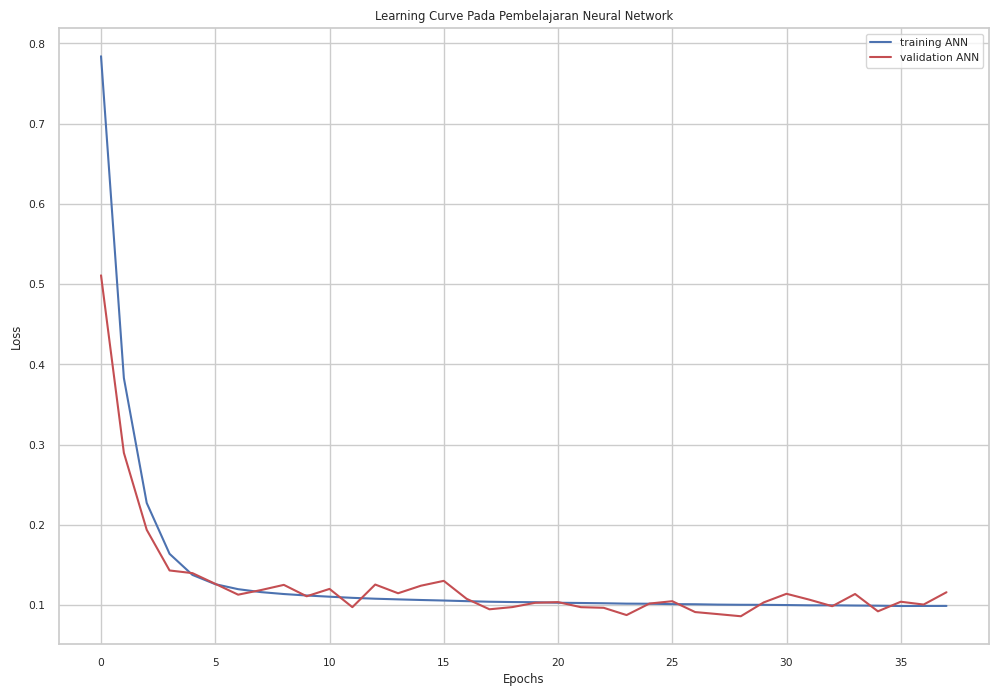

In [ ]:
# Membuat kurva pembelajaran neural network
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure(figsize=(12,8))
plt.plot(loss_values, 'b', label = 'training ANN')
plt.plot(val_loss_values, 'r', label = 'validation ANN')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve Pada Pembelajaran Neural Network")

**Insight**

Kurva pembelajaran menggambarkan seberapa baik model kita. Apakah model mampu menggeneralisasi data atau hanya baik pada salah satu data saja. Berdasarkan kurva pembelajaran (learning curve) di atas, dapat diketahui bahwa nilai loss pada data train dan data validation berhimpit. Hal ini menunjukan bahwa model tidak mengalami overfitting. Overfitting merupakan kondisi di mana model sangat baik dalam mengenali data train, tetapi memiliki performa buruk dalam mengenali data test.

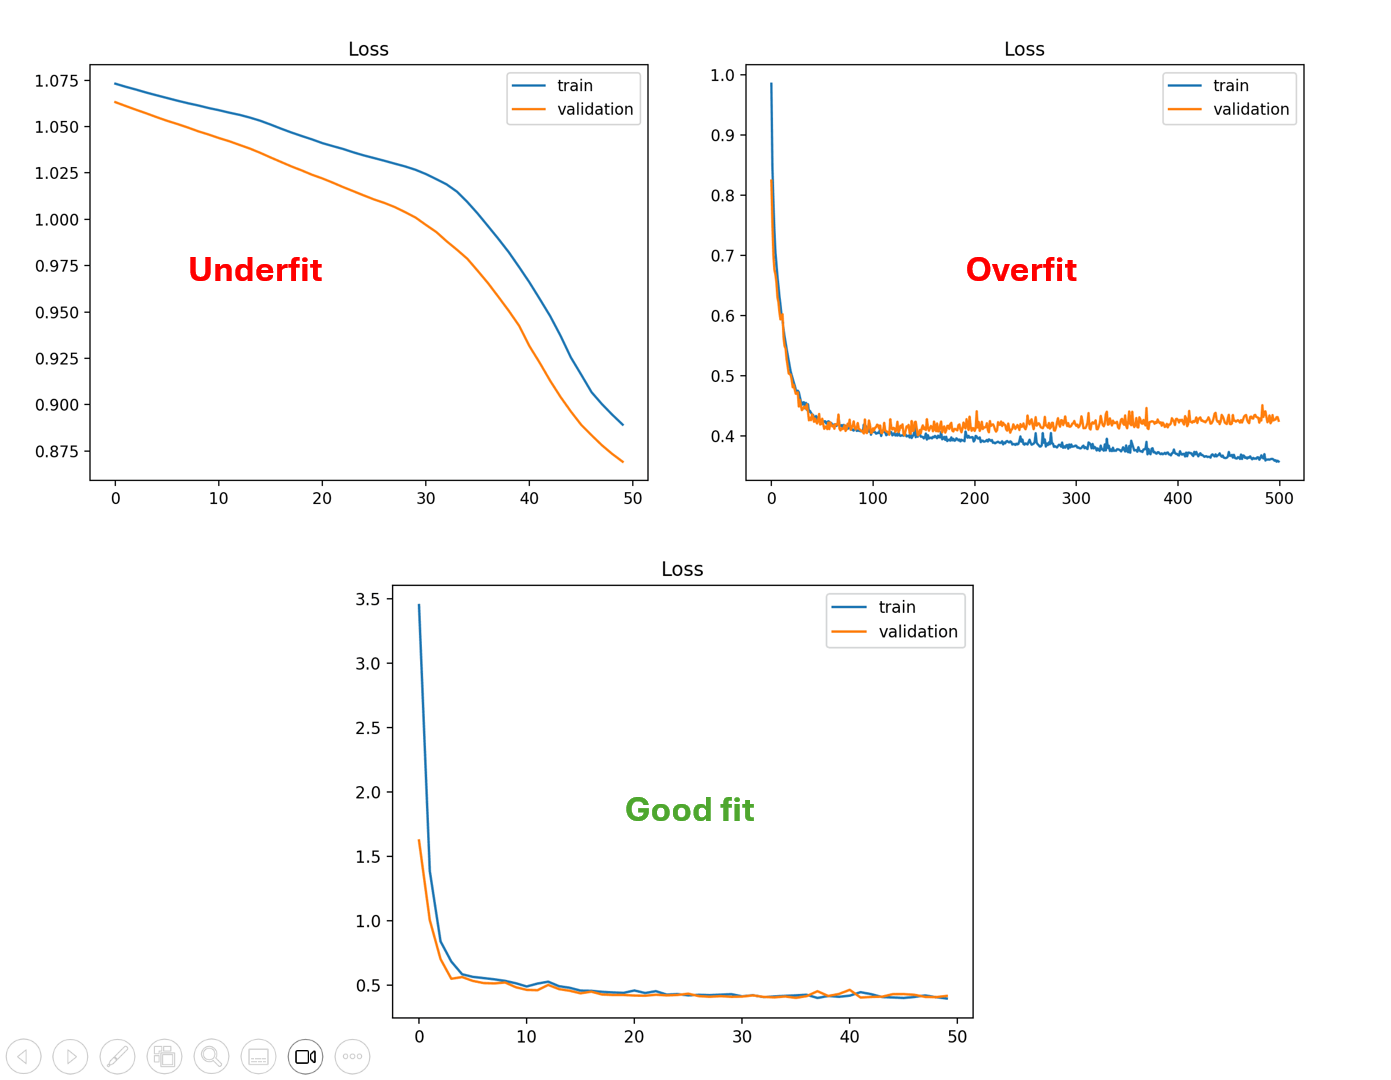

**Catatan**


*   `Underfit` => Model gagal memahami data. Model yang dihasilkan tidak merepresentasikan data training. Tidak baik digunakan untuk proses prediksi. Ditandai dengan garis training dan validation tidak pernah berhimpit (berjauhan).
*   `Overfit` => Model terlalu pintar memahami data. Model sangat baik mengenali data training tetapi hal ini berimbas pada kegagalan model dalam memprediksi data yang tidak pernah dilihat sebelumnya. Model yang overfit juga tidak baik digunakan untuk proses prediksi. Ditandai dengan garis training dan validation yang mulanya berhimpit nampun semakin lama semakin jauh.
*   `Good fit` => Model yang mampu menggenalisir data latih. Model mampu membuat batas antar kelas dengan baik sehingga jika ada data baru, model ini dapat memprediksi dengan baik. Model yang good fit inilah yang cocok digunakan untuk proses prediksi. Ditandai dengan garis training dan validation yang selalu berhimpit sampai akhir proses training.



929/929 [==============================] - 2s 2ms/step


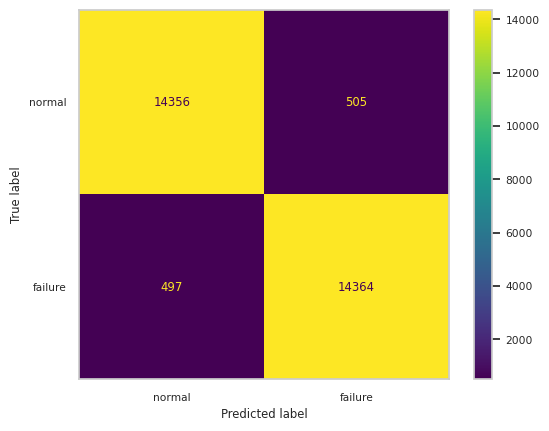

In [ ]:
# Proses prediksi menggunakan data train untuk menguji seberapa baik model yang dihasilkan
y_predict_train = (model_ann.predict(X_train) > 0.5).astype('int32')

# Menampilkan tabel confusion matrix
matrix = metrics.confusion_matrix(y_train, y_predict_train)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.grid(False)
plt.show()

129/129 [==============================] - 0s 2ms/step


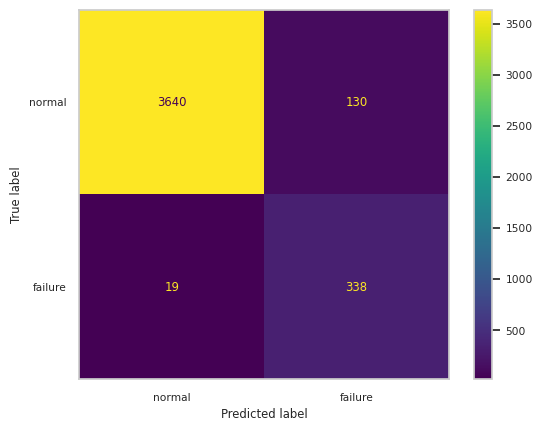

In [ ]:
# Proses prediksi menggunakan data test untuk menguji seberapa baik model yang dihasilkan
y_predict_test = (model_ann.predict(X_test) > 0.5).astype('int32')

# Menampilkan tabel confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predict_test)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.grid(False)
plt.show()

In [ ]:
print("Evaluasi pada Data Train")
print("Accuracy  : ", metrics.accuracy_score(y_train, y_predict_train))
print("Precision : ", metrics.precision_score(y_train, y_predict_train))
print("Recall    : ", metrics.recall_score(y_train, y_predict_train))
print("F1 Score  : ", metrics.f1_score(y_train, y_predict_train))

print("\nEvaluasi pada Data Test")
print("Accuracy  : ", metrics.accuracy_score(y_test, y_predict_test))
print("Precision : ", metrics.precision_score(y_test, y_predict_test))
print("Recall    : ", metrics.recall_score(y_test, y_predict_test))
print("F1 Score  : ", metrics.f1_score(y_test, y_predict_test))

Evaluasi pada Data Train
Accuracy  :  0.9662875984119508
Precision :  0.9660367206940614
Recall    :  0.9665567593028733
F1 Score  :  0.9662966700302723

Evaluasi pada Data Test
Accuracy  :  0.9638962927065665
Precision :  0.7222222222222222
Recall    :  0.9467787114845938
F1 Score  :  0.8193939393939395


**Insight**

Dari nilai evaluasi di atas, dapat disimpulkan sebagai berikut:
*   Performa model memprediksi data train dan data test mengalami **overfitting**. Hal ini dibuktikan dengan penurunan peforma model pada data test. Namun hal ini masih bisa dipakai mengingat batas toleransi untuk overfitting yaitu < 20%.
*   Nilai `accuracy` menunjukan bahwa model mampu memprediksi 96% data dengan benar. Dengan kata lain, dari 4.127 data uji model dapat dengan benar memprediksi 3.992 data.
*   Nilai `precision` menunjukan bahwa dari semua cycle yang diprediksi *failure* oleh model, ternyata hanya 72% yang benar. Dengan kata lain, dari 449 cycle yang diprediksi *failure* ternyata hanya 323 cycle yang benar-benar berstatus failure. Sisanya berstatus normal.
*   Nilai `recall` menunjukan bahwa dari semua cycle yang aktualnya memang benar-benar berstatus failure, ternyata hanya 94% yang berhasil diprediksi *failure* oleh model. Dengan kata lain, dari 357 cycle yang memang failure, mampu memprediksi dengan benar sebanyak 335 cycle. Hanya 22 cycle berstatus *failure* yang terprediksi normal oleh model.
*   Nilai `F1` menunjukan bahwa model mampu mengenali kondisi cycle mesin masih normal dan *failure* dengan baik. Tidak condong ke salah satu kondisi saja.


### 5.3 Model Interpretation (*SHapley Additive exPlanations* / SHAP)

Tahap ini akan menjelaskan prediktor apa yang paling berpengaruh terhadap keputusan model ANN dan prediktor mana saja yang memiliki pengaruh positif atau negatif terhadap model ANN.

In [ ]:
# Mencari nilai SHAP untuk 1000 data yang dipilih secara random
feature_names = data.columns[:-1]
X_train_sample = X_train[np.random.randint(X_train.shape[0], size=1000)]
explainer = shap.Explainer(model_ann, X_train_sample, feature_names=feature_names)
shap_values = explainer(X_train_sample)

PermutationExplainer explainer: 1001it [04:29,  3.67it/s]


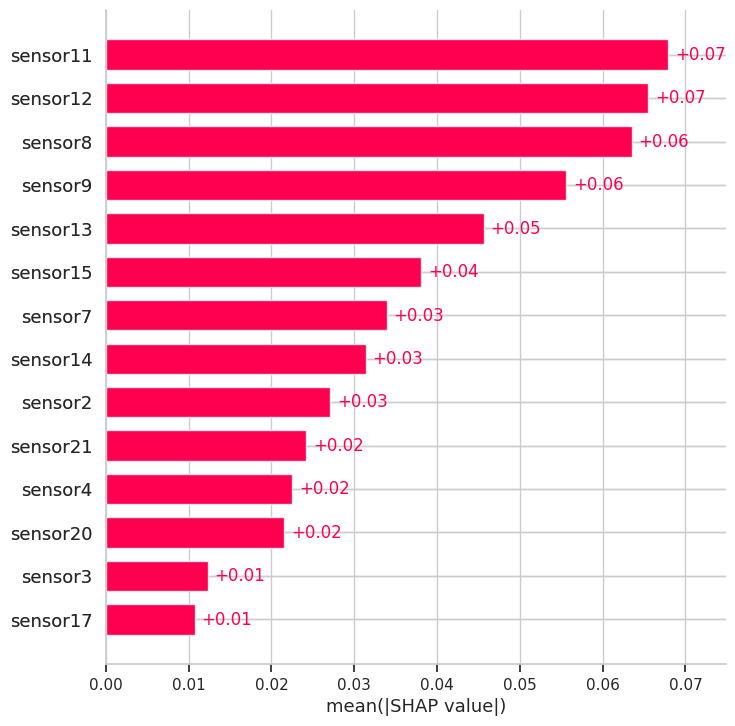

In [ ]:
# Menampilkan feature importance dari nilai SHAP
shap.plots.bar(shap_values, max_display=None)

**Insight**

*   Dari *feature importance* di atas, dapat diketahui urutan prediktor dari yang paling berpengaruh sampai ke yang tidak begitu berpengaruh untuk 1.000 data yang dipilih secara acak. Hal ini dilakukan karena akan memakan waktu yang cukup lama jika menggunakan semua data. Jika menggunakan semua data, sangat mungkin menghasilkan urutan *feature importance* yang berbeda.
*   Nilai SHAP di atas merupakan nilai absolut. Sehingga tidak menjelaskan apakah fitur tersebut memengaruhi prediksi secara positif atau negatif.

*   Dapat dilihat bahwa sensor11 atau sensor **Static Pressure at HPC Outlet (Ps30)** merupakan prediktor yang paling berpengaruh untuk menentukan status mesin apakah normal atau *failure* diikuti oleh sensor4 (**Total temperature at LPT outlet**) dan sensor12 (**Ratio of fuel flow to Ps30**).

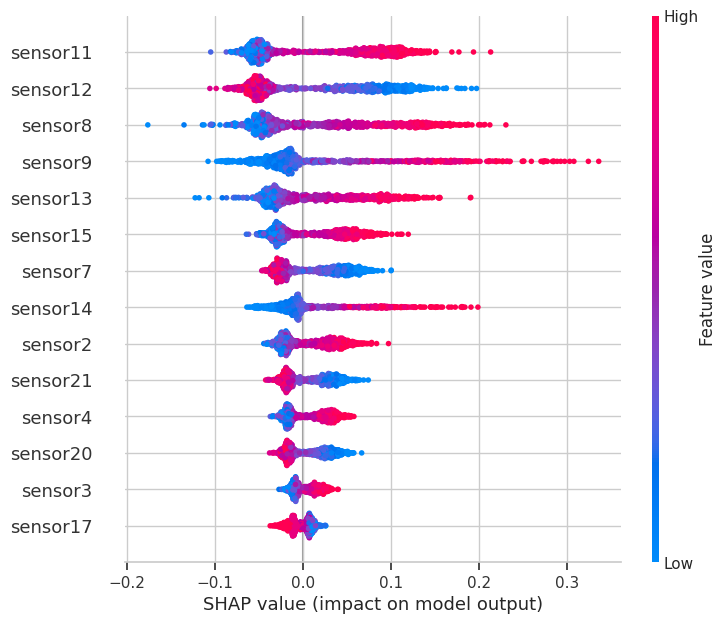

In [ ]:
# Menampilkan beeswarm plot
shap.plots.beeswarm(shap_values, max_display=None)

**Insight**

**Catatan Penting**
*   Nilai SHAP positif => memiliki dampak positif terhadap hasil prediksi. Artinya, hasil prediksi cenderung ke arah kelas 1 (mesin *failure*).
*   Nilai SHAP negatif => memiliki dampak negatif terhadap hasil prediksi. Artinya, hasil prediksi cenderung ke arah kelas 0 (mesin normal).

Untuk mengetahui fitur/prediktor mana saja yang memiliki dampak positif dan negatif terhadap hasil prediksi, maka digunakan **beeswarm plot** seperti di atas. Dari plot tersebut dapat ditarik beberapa sampel informasi sebagai berikut:

*   `Sensor12`. Semakin tinggi nilai sensor12, peluang mesin masih normal semakin tinggi (ditandai dengan nilai SHAP semakin negatif).
*   `Sensor11`. Kebalikan dari `sensor12`. Semakin tinggi nilai `sensor11`, peluang mesin *failure* semakin tinggi (ditandai dengan nilai SHAP semakin positif).

In [ ]:
# Pilih individual data untuk dicek pengaruh masing-masing prediktornya
individual_data = shap_values[0]
individual_data.data

array([-0.79878428, -2.24180986, -0.66930694,  1.00165063, -0.75793188,
       -0.45497422, -1.38597618,  1.07359335, -0.74363001, -0.25777246,
       -0.33958062, -0.6914943 ,  1.74032875,  0.95887595])

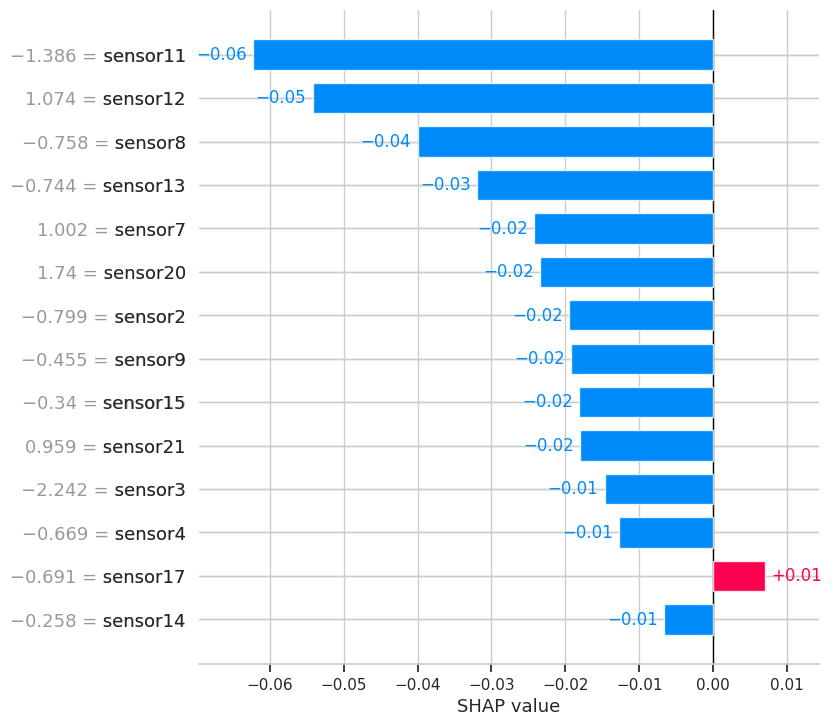

In [ ]:
# Menampilkan pengaruh masing-masing prediktor terhadap suatu individual data
shap.plots.bar(individual_data, max_display=None)

**Insight**

Dari plot di atas untuk suatu data individu dapat dilihat bahwa dari semua prediktor, terdapat 13 prediktor yang mengarahkan ke kelas mesin normal (SHAP negatif). Sedangkan sisanya, mengarahkan ke kelas mesin *failure* (SHAP positif) yaitu sensor17. Sehingga dari plot tersebut dapat terlihat bahwa data tersebut masuk kategori mesin normal.

## 6. Deployment

**Overview**<hr>

Tahap ini digunakan untuk menetapkan model yang akan digunakan untuk proses prediksi. Kemudian dilakukan proses prediksi data baru untuk menghasilkan suatu output.

**Objectives**<hr>

Hal ini penting dilakukan untuk memudahkan user dalam menggunakan model yang telah dibuat. User hanya perlu memasukkan data sensor dan langsung mendapatkan hasil prediksi apakah suatu mesin normal atau *failure* tanpa harus mengerti kode d belakangnya dan tidak perlu menjalankan semua kode pada *notebook* ini.

Untuk proses deployment, digunakan tools bernama Flask. User diminta untuk memasukkan data sensor yang diminta. Berbekal model ML yang sudah dilatih sebelumnya, model akan memprediksi apakah suatu mesin masih normal atau *failure* berdasarkan data sensor yang telah dimasukkan oleh user.

### 6.1 Halaman Awal

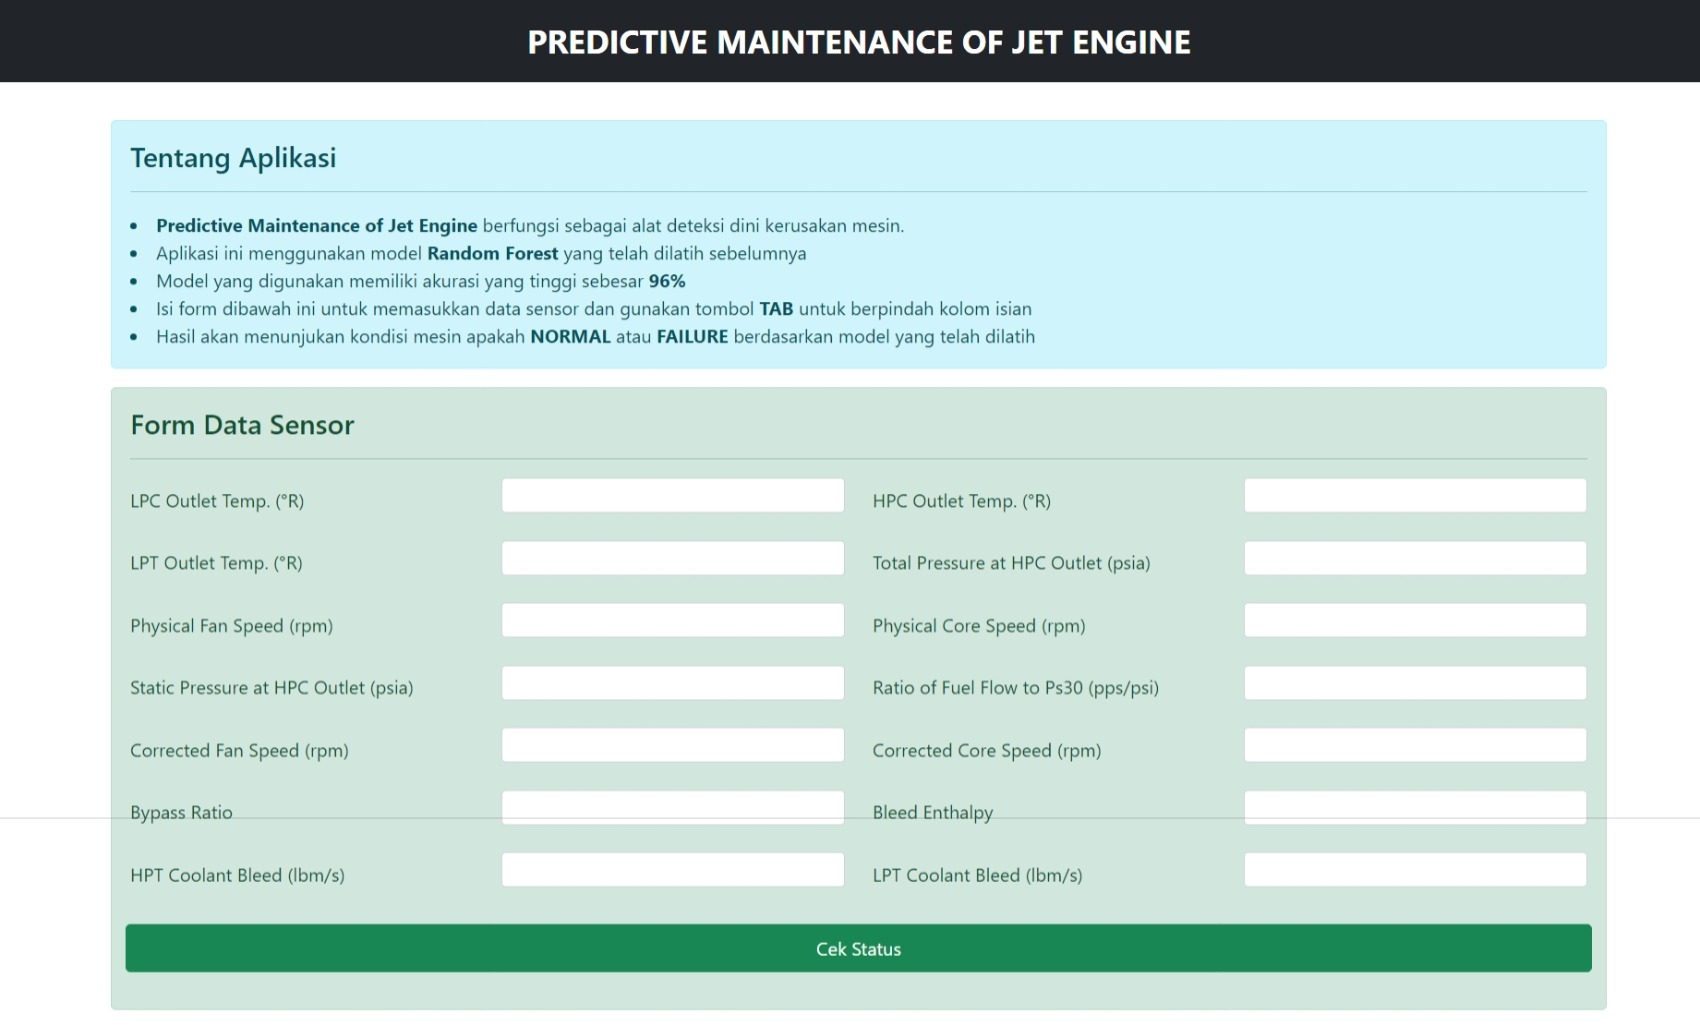

### 6.2 Tampilan Ketika Mesin Diprediksi Normal

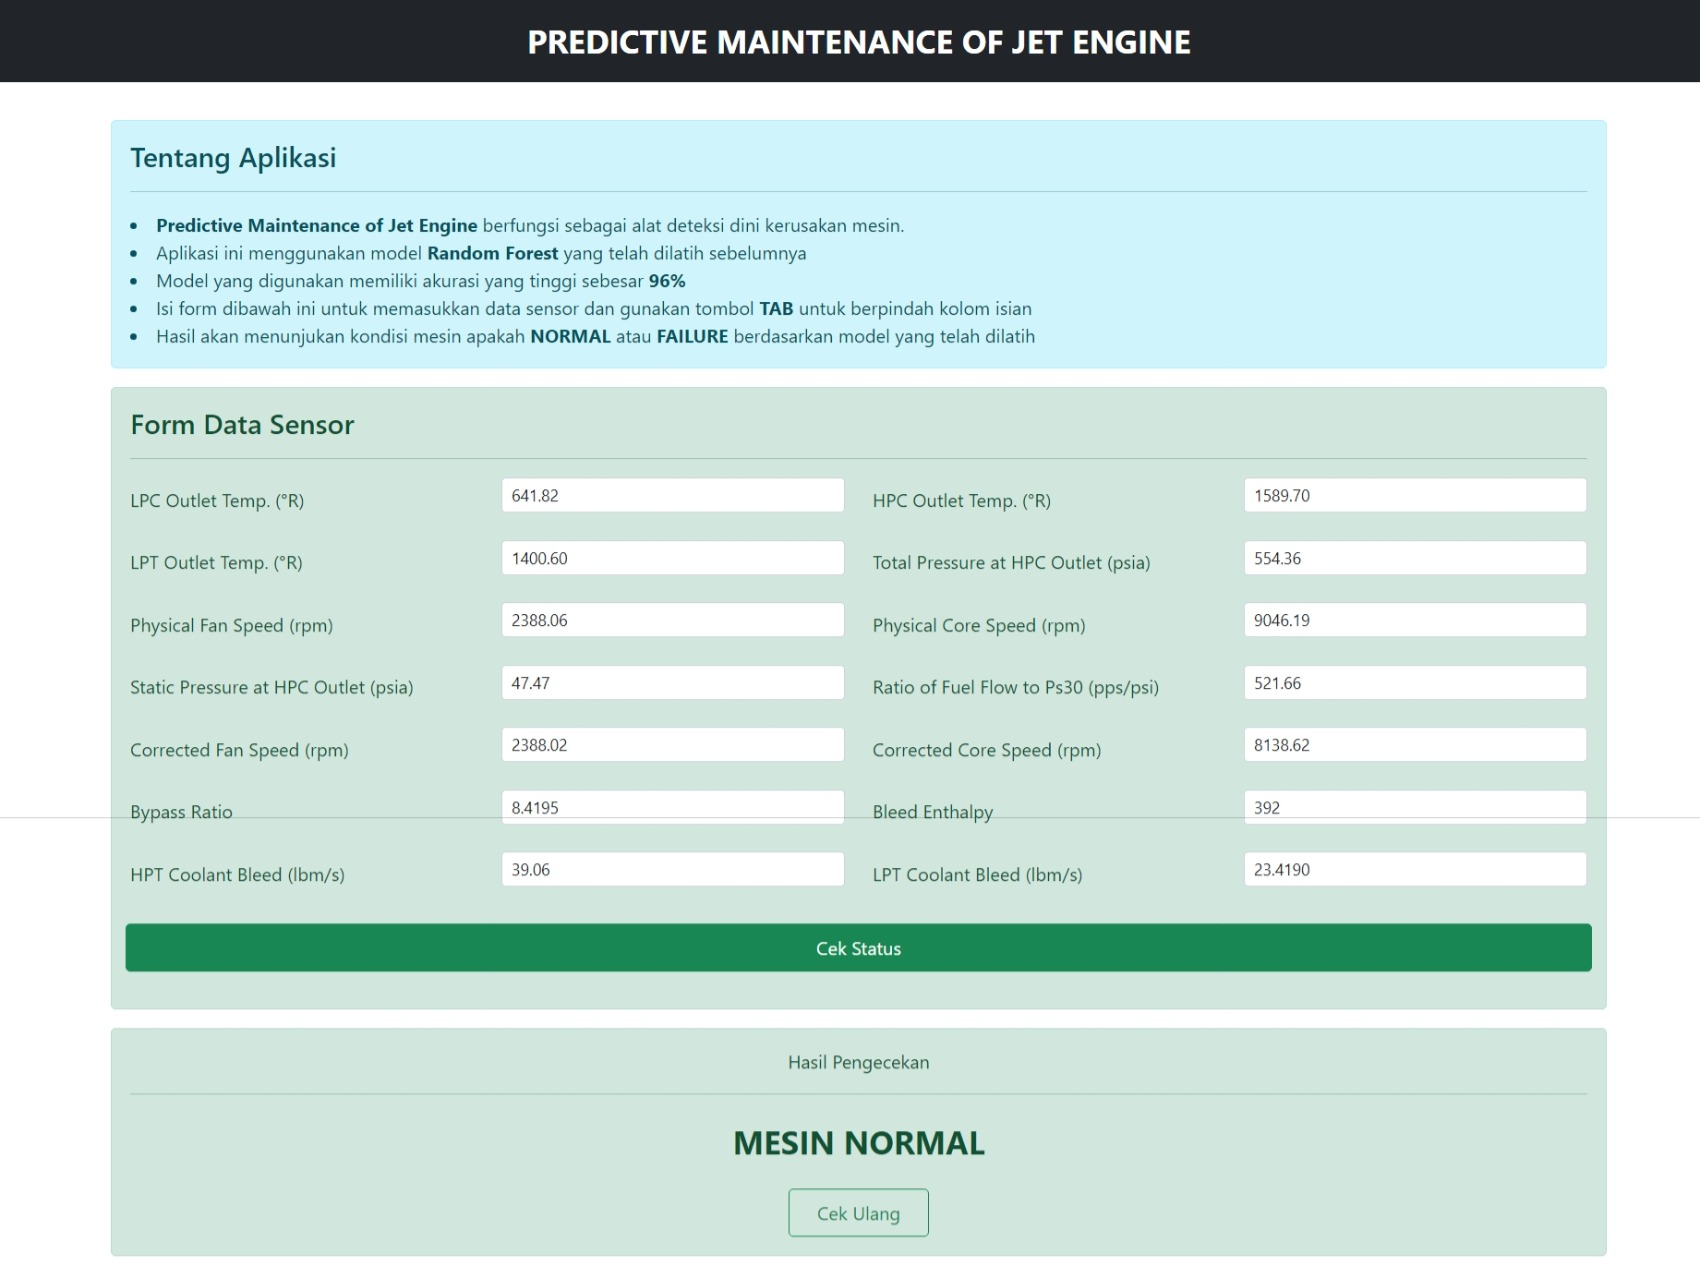

### 6.3 Tampilan Ketika Mesin Diprediksi Failure

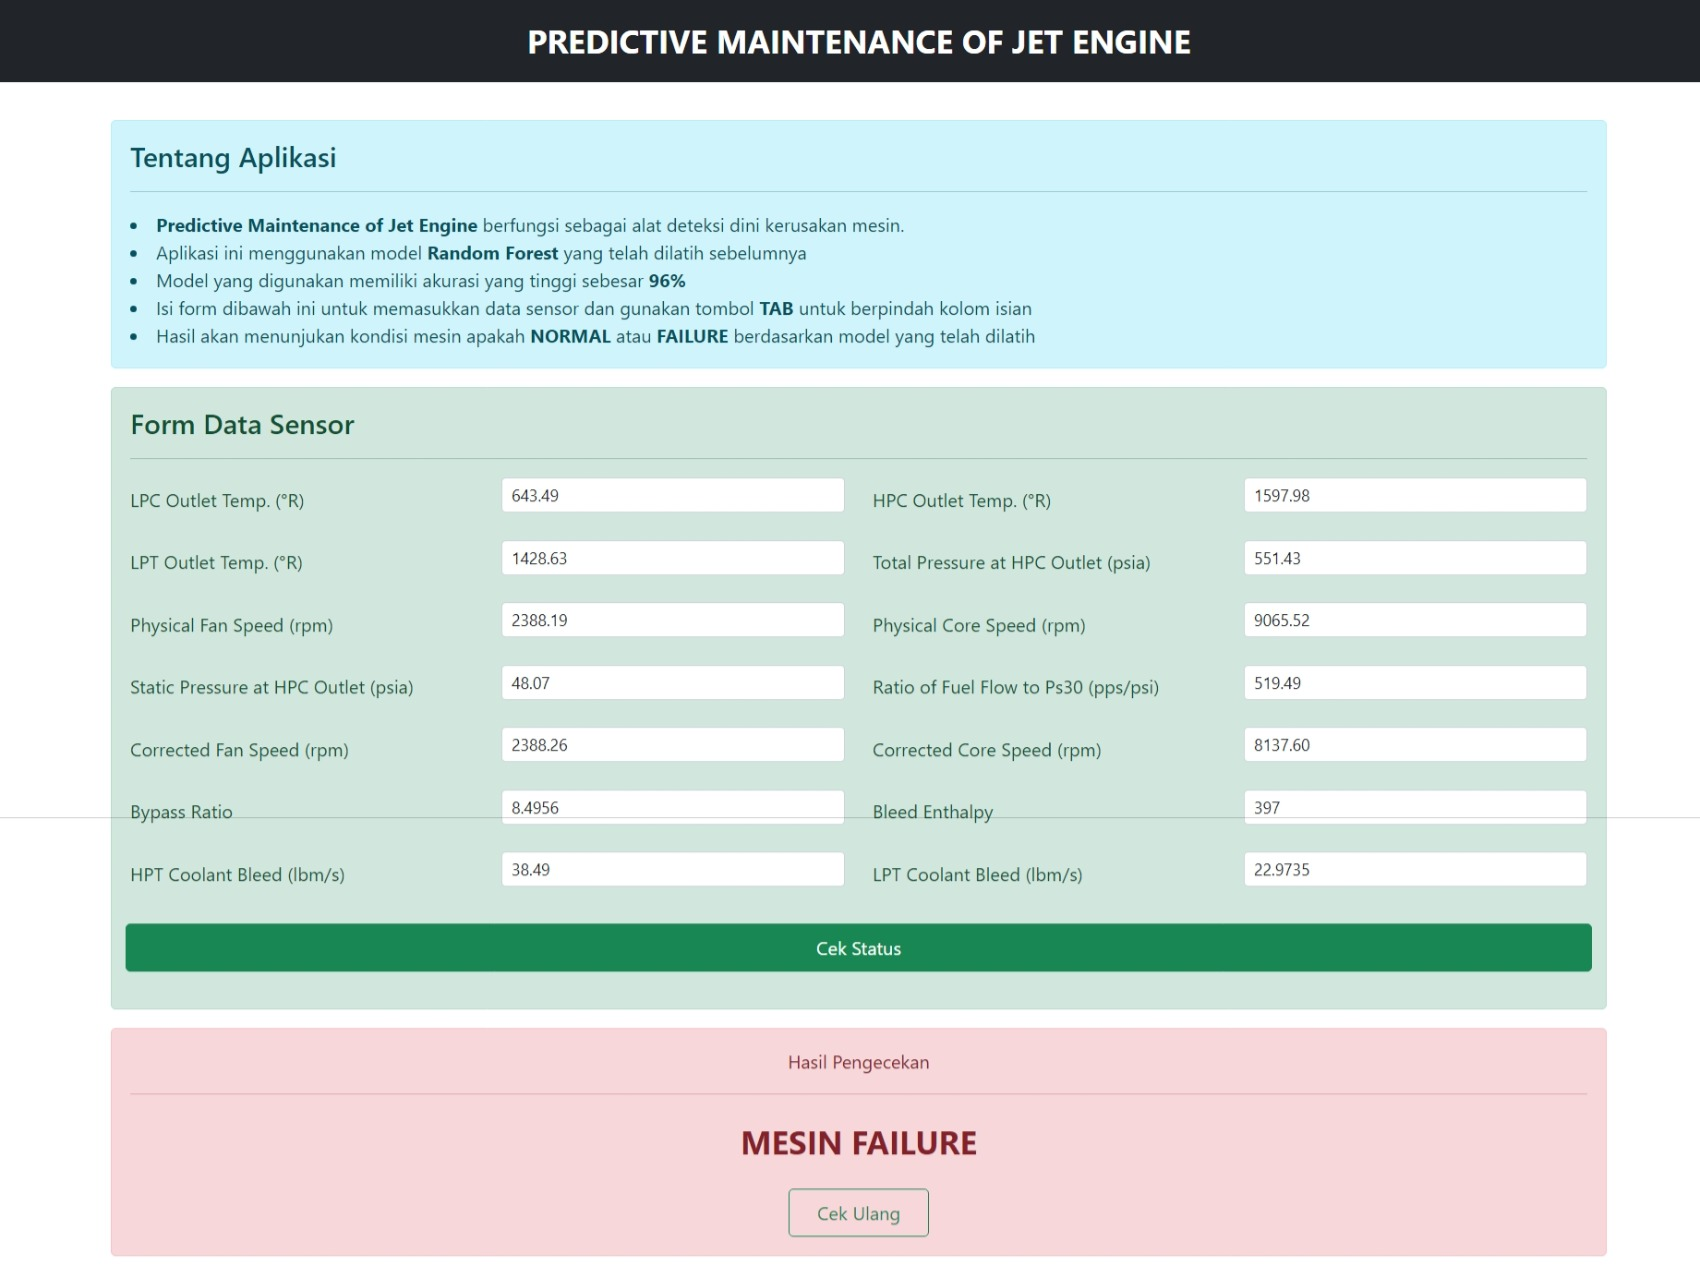

## Conclusion

Berdasarkan pengerjaan yang telah dilakukan, berikut kesimpulan yang dapat diambil:


*   Proyek ini bermanfaat untuk memprediksi apakah suatu mesin masih normal atau rusak (*failure*) berdasarkan data sensor yang ada. (Proyek ini menggunakan 20 cycle sebagai deteksi dini sebelum mesin benar-benar *failure*. Diharapkan para teknisi dapat mencari mesin pengganti sebelum mesin benar-benar *failure* ).
*   Dari total 21 data sensor yang tersedia, hanya 14 sensor yang memiliki pengaruh cukup kuat terhadap hasil prediksi (Menggunakan threshold nilai korelasi = 0.2 untuk seleksi fitur).
*   Tidak semua sensor di mana semakin rendah nilainya maka mesin berpeluang masih berstatus normal. Terdapat beberapa sensor yang semakin rendah nilainya akan menyebabkan mesin berstatus *failure* dan begitu juga sebaliknya.
*   Ada 3 data sensor yang paling memiliki pengaruh terhadap hasil prediksi, yaitu sensor11, sensor12, dan sensor8 (pada saat di tes menggunakan 1.000 data. Jika menggunakan semua data, bisa berubah).
*   Model yang dihasikan sudah cukup baik dibuktikan dengan nilai `Recall` mencapai > 90%. Baik ketika menggunakan algoritma `Random Forest` maupun `Artificial Neural Network`. Metrik evaluasi yang diutamakan pada proyek ini yaitu nilai `Recall` karena kita ingin model mampu dengan baik memprediksi mesin *failure*. Lebih baik memprediksi mesin *failure* tetapi sebenarnya masih normal, daripada memprediksi mesin normal tapi nyatanya *failure* (*type 2 error*).
*   Proyek ini tidak hanya berlaku untuk mesin jet NASA saja. Tetapi bisa juga digunakan untuk mesin-mesin yang lain yang dipantau oleh sensor-sensor seperti mesin mobil yang memiliki ECU (*Electronic Control Unit*), mesin pabrik yang digunakan untuk proses produksi, dan mesin/alat elektronik lainnya dengan pemantauan sensor-sensor.



## Further Improvement



1.  Gunakan semua data dalam proses SHAP untuk mengetahui peringkat prediktor yang mempengaruhi hasil prediksi secara komprehensif.
2.  Lakukan tuning dengan pilihan hyperparamter yang lebih banyak untuk meningkatkan nilai `precision`. Baik pada algoritma Random Forest maupun Artificial Neural Network.
3.  Gunakan metode lain seperti `unsupervised learning` untuk mencari klaster mesin normal dan mesin *failure* daripada hanya menggunakan pendekatan nilai threshold yang bersifat bias. Kemudian bandingkan hasilnya.
